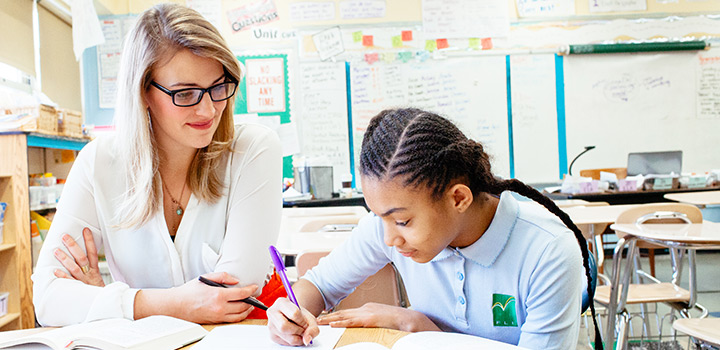

- Author: Marco Bours
- Date: Aug 13, 2020
- Context: Final Project for the course 'Making Money with Data' lectured by Jitesh Shah from Microfacturing Institutes in cooperation with the Extension of the University of California, Santa Cruz

## Contents

# Where is the best place for a teacher to live in California? 

In the news you constantly read and hear that teachers in Californian urban areas can barely make a living. Transparent California (https://transparentcalifornia.com/) offers income data on K-12 Schools to give the Californian inhabitants accountability for the educational spending. Together with cost of living data provided by salary.com (https://www.salary.com/research/cost-of-living/ca) it is possible to see how teachers fair in different counties. Is it better for a teacher in the country side or is a higher salary in the urban areas worthwhile? 

## 1 What is the cost of living in California?

Let's take a look at the cost of living. To get an idea how the cost of living is distributed over California, the table with cost of living is seperated into 5 categories. Each county is then colored according to the category. From the colorful map we can now see where the cost of living clusters. 

### 1.1 Process the cost of living data

Process the cost of living data to check for completeness and create 5 categories of cost of living

In [1]:
import pandas as pd 

In [2]:
col=pd.read_csv('CostOfLovingCAByCounty.csv')

In [3]:
col.sort_values(by = 'CostOfLiving')

,City,County,State,CostOfLiving
106,Crescent City,Del Norte,California,86.8
92,Alturas,Modoc,California,86.8
98,Susanville,Lassen,California,92.8
91,Bridgeport,Mono,California,93.7
83,Yreka,Siskiyou,California,94.5
...,...,...,...,...
2,San Jose,Santa Clara,California,151.4
62,Santa Clara,Santa Clara,California,151.4
3,San Francisco,San Francisco,California,162.5
96,San Rafael,Marin,California,162.5


In [4]:
# Calculate the minumum and maximum 'CostOfLiving'
# Take the range and divide it into 5 equal categories
col_min=col['CostOfLiving'].min()
col_max=col['CostOfLiving'].max()
col_range=col_max-col_min
bucket_size=col_range/5
limit1=col_min+bucket_size
limit2=col_min + 2*bucket_size
limit3=col_min + 3*bucket_size
limit4=col_max-bucket_size
# print(col_min, col_max, col_range, bucket_size)

In [5]:
# Create a function to split the 'CostOfLiving' into 5 categories
def color_code(number):
    if number <= limit1:
        return 1
    elif number <= limit2:
        return 2
    elif number <= limit3:
        return 3
    elif number <= limit4:
        return 4
    else:
        return 5 

In [6]:
col['ColorCode']=col['CostOfLiving'].apply(color_code)
col

,City,County,State,CostOfLiving,ColorCode
0,Los Angeles,Los Angeles,California,142.6,4
1,San Diego,San Diego,California,138.6,4
2,San Jose,Santa Clara,California,151.4,5
3,San Francisco,San Francisco,California,162.5,5
4,Fresno,Fresno,California,110.3,2
...,...,...,...,...,...
107,Colusa,Colusa,California,99.9,1
108,San Andreas,Calaveras,California,125.9,3
109,Jackson,Amador,California,120.5,3
110,Markleeville,Alpine,California,111.8,2


https://en.wikipedia.org/wiki/List_of_counties_in_California

In [7]:
# Verify that the list of counties is complete
counties=pd.read_csv('CACounties.csv')
counties

,County,FIPS code,County seat,Est,Formed from,Etymology,General Law or Charter,Population,Area_sqmi,Area_km2
0,Yuba,115,Marysville,1850,original,Named either by the Maidu people a local Nativ...,General Law,78668,630,1632
1,Yolo,113,Woodland,1850,original,The Yolan people a local Native American tribe.,General Law,220500,1012,2621
2,Ventura,111,Ventura,1872,Santa Barbara,The city of Ventura derived from Mission San B...,General Law,846006,1846,4781
3,Tuolumne,109,Sonora,1850,original,Exact etymology disputed; probably a corruptio...,General Law,54478,2236,5791
4,Tulare,107,Visalia,1852,Mariposa,Tulare Lake which is named after the tule rush...,General Law,466195,4824,12494
5,Trinity,105,Weaverville,1850,original,"The city of Trinidad Spanish for ""trinity"".",General Law,12285,3179,8234
6,Tehama,103,Red Bluff,1856,Butte Colusa and Shasta,The city of Tehama probably a native term desc...,Charter,65084,2951,7643
7,Sutter,101,Yuba City,1850,original,John Sutter a Swiss pioneer of California asso...,General Law,96971,603,1562
8,Stanislaus,99,Modesto,1854,Tuolumne,Stanislaus River named after Estanislao a nati...,General Law,550660,1495,3872
9,Sonoma,97,Santa Rosa,1850,original,Exact etymology disputed; probably a Pomo term...,General Law,494336,1576,4082


In [8]:
# Check for typos. E.g. Los Angeles could also bw listed as Los Angelos. 
col_counties=col['County'].unique()
col_counties.sort()
col_counties

array(['Alameda', 'Alpine', 'Amador', 'Butte', 'Calaveras', 'Colusa',
       'Contra Costa', 'Del Norte', 'El Dorado', 'Fresno', 'Glenn',
       'Humboldt', 'Imperial', 'Inyo', 'Kern', 'Kings', 'Lake', 'Lassen',
       'Los Angeles', 'Madera', 'Marin', 'Mariposa', 'Mendocino',
       'Merced', 'Modoc', 'Mono', 'Monterey', 'Napa', 'Nevada', 'Orange',
       'Placer', 'Plumas', 'Riverside', 'Sacramento', 'San Benito',
       'San Bernardino', 'San Diego', 'San Francisco', 'San Joaquin',
       'San Luis Obispo', 'San Mateo', 'Santa Barbara', 'Santa Clara',
       'Santa Cruz', 'Shasta', 'Sierra', 'Siskiyou', 'Solano', 'Sonoma',
       'Stanislaus', 'Sutter', 'Tehama', 'Trinity', 'Tulare', 'Tuolumne',
       'Ventura', 'Yolo', 'Yuba'], dtype=object)

In [9]:
# How many counties are there in the list vs how many does Wikipedia say rhere exist. 
len(col_counties)

58

In [10]:
# If there is a county missing, get the county seat and look up the cost of living. 
# Get all 'County seat'
counties.loc[
    (counties['County'] != col_counties[0]) &
    (counties['County'] != col_counties[1]) &
    (counties['County'] != col_counties[2]) &
    (counties['County'] != col_counties[3]) &
    (counties['County'] != col_counties[4]) &
    (counties['County'] != col_counties[5]) &
    (counties['County'] != col_counties[6]) &
    (counties['County'] != col_counties[7]) &
    (counties['County'] != col_counties[8]) &
    (counties['County'] != col_counties[9]) &
    (counties['County'] != col_counties[10]) &
    (counties['County'] != col_counties[11]) &
    (counties['County'] != col_counties[12]) &
    (counties['County'] != col_counties[13]) &
    (counties['County'] != col_counties[14]) &
    (counties['County'] != col_counties[15]) &
    (counties['County'] != col_counties[16]) &
    (counties['County'] != col_counties[17]) &
    (counties['County'] != col_counties[18]) &
    (counties['County'] != col_counties[19]) &
    (counties['County'] != col_counties[20]) &
    (counties['County'] != col_counties[21]) &
    (counties['County'] != col_counties[22]) &
    (counties['County'] != col_counties[23]) &
    (counties['County'] != col_counties[24]) &
    (counties['County'] != col_counties[25]) &
    (counties['County'] != col_counties[26]) &
    (counties['County'] != col_counties[27]) &
    (counties['County'] != col_counties[28]) &
    (counties['County'] != col_counties[29]) &
    (counties['County'] != col_counties[30]) &
    (counties['County'] != col_counties[31]) &
    (counties['County'] != col_counties[32]) &
    (counties['County'] != col_counties[33]) &
    (counties['County'] != col_counties[34]) &
    (counties['County'] != col_counties[35]) &
    (counties['County'] != col_counties[36]) &
    (counties['County'] != col_counties[37]) &
    (counties['County'] != col_counties[38]) &
    (counties['County'] != col_counties[39]) &
    (counties['County'] != col_counties[40]) &
    (counties['County'] != col_counties[41]) &
    (counties['County'] != col_counties[42]) &
    (counties['County'] != col_counties[43]) &
    (counties['County'] != col_counties[44]) &
    (counties['County'] != col_counties[45]) &
    (counties['County'] != col_counties[46]) &
    (counties['County'] != col_counties[47]) &
    (counties['County'] != col_counties[48]) &
    (counties['County'] != col_counties[49]) &
    (counties['County'] != col_counties[50]) &
    (counties['County'] != col_counties[51]) &
    (counties['County'] != col_counties[52]) &
    (counties['County'] != col_counties[53]) &
    (counties['County'] != col_counties[54]) &
    (counties['County'] != col_counties[55]) &
    (counties['County'] != col_counties[56]) &
    (counties['County'] != col_counties[57])
     ]['County seat']

Series([], Name: County seat, dtype: object)

In [11]:
# Get all 'County' to find missing entries in col_counties
counties.loc[
    (counties['County'] != col_counties[0]) &
    (counties['County'] != col_counties[1]) &
    (counties['County'] != col_counties[2]) &
    (counties['County'] != col_counties[3]) &
    (counties['County'] != col_counties[4]) &
    (counties['County'] != col_counties[5]) &
    (counties['County'] != col_counties[6]) &
    (counties['County'] != col_counties[7]) &
    (counties['County'] != col_counties[8]) &
    (counties['County'] != col_counties[9]) &
    (counties['County'] != col_counties[10]) &
    (counties['County'] != col_counties[11]) &
    (counties['County'] != col_counties[12]) &
    (counties['County'] != col_counties[13]) &
    (counties['County'] != col_counties[14]) &
    (counties['County'] != col_counties[15]) &
    (counties['County'] != col_counties[16]) &
    (counties['County'] != col_counties[17]) &
    (counties['County'] != col_counties[18]) &
    (counties['County'] != col_counties[19]) &
    (counties['County'] != col_counties[20]) &
    (counties['County'] != col_counties[21]) &
    (counties['County'] != col_counties[22]) &
    (counties['County'] != col_counties[23]) &
    (counties['County'] != col_counties[24]) &
    (counties['County'] != col_counties[25]) &
    (counties['County'] != col_counties[26]) &
    (counties['County'] != col_counties[27]) &
    (counties['County'] != col_counties[28]) &
    (counties['County'] != col_counties[29]) &
    (counties['County'] != col_counties[30]) &
    (counties['County'] != col_counties[31]) &
    (counties['County'] != col_counties[32]) &
    (counties['County'] != col_counties[33]) &
    (counties['County'] != col_counties[34]) &
    (counties['County'] != col_counties[35]) &
    (counties['County'] != col_counties[36]) &
    (counties['County'] != col_counties[37]) &
    (counties['County'] != col_counties[38]) &
    (counties['County'] != col_counties[39]) &
    (counties['County'] != col_counties[40]) &
    (counties['County'] != col_counties[41]) &
    (counties['County'] != col_counties[42]) &
    (counties['County'] != col_counties[43]) &
    (counties['County'] != col_counties[44]) &
    (counties['County'] != col_counties[45]) &
    (counties['County'] != col_counties[46]) &
    (counties['County'] != col_counties[47]) &
    (counties['County'] != col_counties[48]) &
    (counties['County'] != col_counties[49]) &
    (counties['County'] != col_counties[50]) &
    (counties['County'] != col_counties[51]) &
    (counties['County'] != col_counties[52]) &
    (counties['County'] != col_counties[53]) &
    (counties['County'] != col_counties[54]) &
    (counties['County'] != col_counties[55]) &
    (counties['County'] != col_counties[56]) &
    (counties['County'] != col_counties[57]) 
     ]['County']

Series([], Name: County, dtype: object)

In [12]:
# Get the entire list of County not in col_counties
# If the list is empty, all counties are in col_counties
counties.loc[
    (counties['County'] != col_counties[0]) &
    (counties['County'] != col_counties[1]) &
    (counties['County'] != col_counties[2]) &
    (counties['County'] != col_counties[3]) &
    (counties['County'] != col_counties[4]) &
    (counties['County'] != col_counties[5]) &
    (counties['County'] != col_counties[6]) &
    (counties['County'] != col_counties[7]) &
    (counties['County'] != col_counties[8]) &
    (counties['County'] != col_counties[9]) &
    (counties['County'] != col_counties[10]) &
    (counties['County'] != col_counties[11]) &
    (counties['County'] != col_counties[12]) &
    (counties['County'] != col_counties[13]) &
    (counties['County'] != col_counties[14]) &
    (counties['County'] != col_counties[15]) &
    (counties['County'] != col_counties[16]) &
    (counties['County'] != col_counties[17]) &
    (counties['County'] != col_counties[18]) &
    (counties['County'] != col_counties[19]) &
    (counties['County'] != col_counties[20]) &
    (counties['County'] != col_counties[21]) &
    (counties['County'] != col_counties[22]) &
    (counties['County'] != col_counties[23]) &
    (counties['County'] != col_counties[24]) &
    (counties['County'] != col_counties[25]) &
    (counties['County'] != col_counties[26]) &
    (counties['County'] != col_counties[27]) &
    (counties['County'] != col_counties[28]) &
    (counties['County'] != col_counties[29]) &
    (counties['County'] != col_counties[30]) &
    (counties['County'] != col_counties[31]) &
    (counties['County'] != col_counties[32]) &
    (counties['County'] != col_counties[33]) &
    (counties['County'] != col_counties[34]) &
    (counties['County'] != col_counties[35]) &
    (counties['County'] != col_counties[36]) &
    (counties['County'] != col_counties[37]) &
    (counties['County'] != col_counties[38]) &
    (counties['County'] != col_counties[39]) &
    (counties['County'] != col_counties[40]) &
    (counties['County'] != col_counties[41]) &
    (counties['County'] != col_counties[42]) &
    (counties['County'] != col_counties[43]) &
    (counties['County'] != col_counties[44]) &
    (counties['County'] != col_counties[45]) &
    (counties['County'] != col_counties[46]) &
    (counties['County'] != col_counties[47]) &
    (counties['County'] != col_counties[48]) &
    (counties['County'] != col_counties[49]) &
    (counties['County'] != col_counties[50]) &
    (counties['County'] != col_counties[51]) &
    (counties['County'] != col_counties[52]) &
    (counties['County'] != col_counties[53]) &
    (counties['County'] != col_counties[54]) &
    (counties['County'] != col_counties[55]) &
    (counties['County'] != col_counties[56]) &
    (counties['County'] != col_counties[57])
     ]

,County,FIPS code,County seat,Est,Formed from,Etymology,General Law or Charter,Population,Area_sqmi,Area_km2


In [13]:
# This is a helper to find missing counties
# Only print the first 3 columns of county to help match the county with its seat
counties.iloc[:,0:3]

,County,FIPS code,County seat
0,Yuba,115,Marysville
1,Yolo,113,Woodland
2,Ventura,111,Ventura
3,Tuolumne,109,Sonora
4,Tulare,107,Visalia
5,Trinity,105,Weaverville
6,Tehama,103,Red Bluff
7,Sutter,101,Yuba City
8,Stanislaus,99,Modesto
9,Sonoma,97,Santa Rosa


In [14]:
# This is a helper to find missing counties
# Only get the 'County seat' and 'County' to match the county with its seat
counties[['County seat', 'County']]

,County seat,County
0,Marysville,Yuba
1,Woodland,Yolo
2,Ventura,Ventura
3,Sonora,Tuolumne
4,Visalia,Tulare
5,Weaverville,Trinity
6,Red Bluff,Tehama
7,Yuba City,Sutter
8,Modesto,Stanislaus
9,Santa Rosa,Sonoma


### 1.2 Create a color coded map

Color Scheme:
   - 1 Blue   - cheapest 
   - 2 Green  - cheap
   - 3 Yellow - medium
   - 4 Orange - expensive
   - 5 Red    - most expensive
   
Fill in the map with colors. Fill ColorCode 1 counties with blue, ColorCode 2 counties with green, ColorCode 3 counties with yellow, ColorCode 4 counties with orange and ColorCode 5 counties with red.

In [15]:
# blue
col.loc[col['ColorCode'] == 1].sort_values('CostOfLiving')

,City,County,State,CostOfLiving,ColorCode
92,Alturas,Modoc,California,86.8,1
106,Crescent City,Del Norte,California,86.8,1
98,Susanville,Lassen,California,92.8,1
91,Bridgeport,Mono,California,93.7,1
83,Yreka,Siskiyou,California,94.5,1
88,Quincy,Plumas,California,99.8,1
84,Downieville,Sierra,California,99.9,1
107,Colusa,Colusa,California,99.9,1
97,Madera,Madera,California,101.9,1


In [16]:
# Green
col.loc[col['ColorCode'] == 2].sort_values('CostOfLiving')

,City,County,State,CostOfLiving,ColorCode
101,Independence,Inyo,California,106.3,2
89,Nevada City,Nevada,California,108.9,2
75,Visalia,Tulare,California,109.0,2
100,Hanford,Kings,California,109.3,2
51,Pasadena,Los Angeles,California,109.6,2
4,Fresno,Fresno,California,110.3,2
104,Willows,Glenn,California,110.4,2
82,Yuba City,Sutter,California,110.4,2
110,Markleeville,Alpine,California,111.8,2
10,Bakersfield,Kern,California,112.6,2


In [17]:
# Yellow
col.loc[col['ColorCode'] == 3].sort_values('CostOfLiving')

,City,County,State,CostOfLiving,ColorCode
111,Oroville,Butte,California,118.5,3
15,Chico,Butte,California,118.5,3
79,Sonora,Tuolumne,California,118.5,3
86,San Luis Obispo,San Luis Obispo,California,119.5,3
78,Woodland,Yolo,California,120.5,3
77,Marysville,Yuba,California,120.5,3
109,Jackson,Amador,California,120.5,3
57,Roseville,Placer,California,120.5,3
5,Sacramento,Sacramento,California,120.5,3
25,Elk Grove,Sacramento,California,120.5,3


In [18]:
# Orange
col.loc[col['ColorCode'] == 4].sort_values('CostOfLiving')

,City,County,State,CostOfLiving,ColorCode
69,Temecula,Riverside,California,132.5,4
42,Murrieta,Riverside,California,132.8,4
102,El Centro,Imperial,California,134.6,4
87,Hollister,San Benito,California,136.1,4
1,San Diego,San Diego,California,138.6,4
16,Chula Vista,San Diego,California,138.6,4
23,El Cajon,San Diego,California,138.6,4
64,Santa Cruz,Santa Cruz,California,139.9,4
11,Berkeley,Alameda,California,141.3,4
18,Concord,Contra Costa,California,141.3,4


In [19]:
# Red
col.loc[col['ColorCode'] == 5].sort_values('CostOfLiving')

,City,County,State,CostOfLiving,ColorCode
2,San Jose,Santa Clara,California,151.4,5
62,Santa Clara,Santa Clara,California,151.4,5
3,San Francisco,San Francisco,California,162.5,5
21,Daly City,San Mateo,California,162.5,5
96,San Rafael,Marin,California,162.5,5


Now let's take a look at the map with all counties colored. 

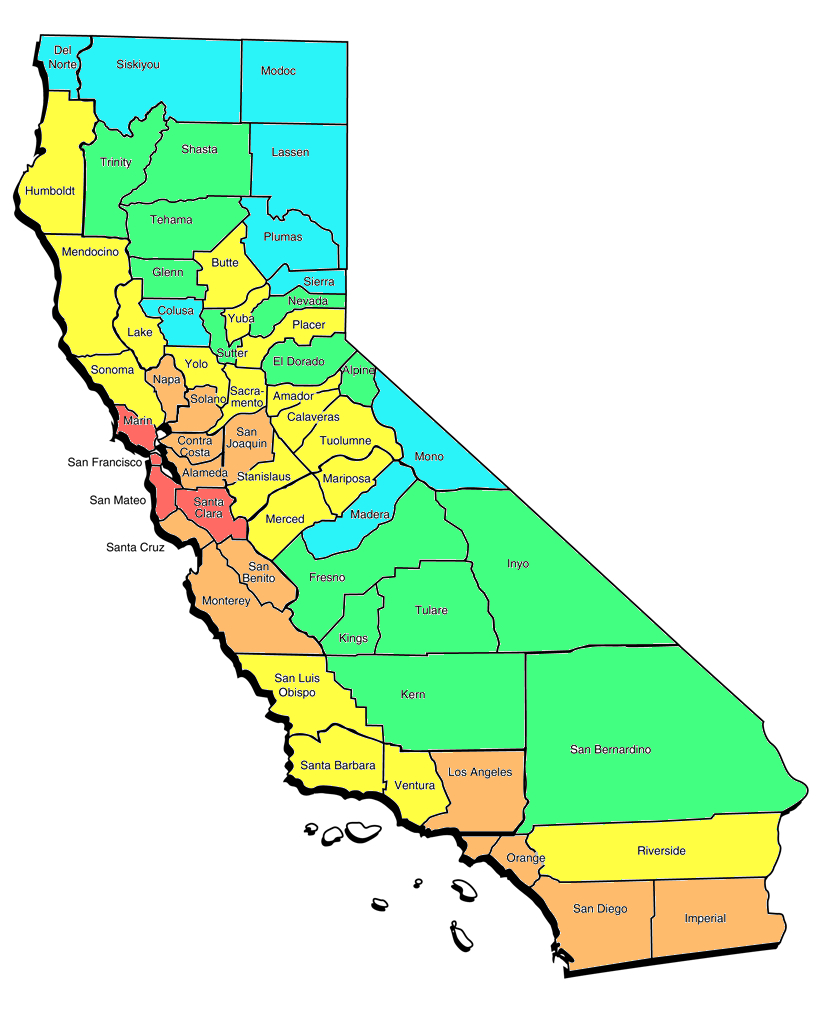

### 1.3 What can you read from the colorful map? 

California has 2 centers where the cost of living is very high: Los Angeles and the San Francisco Bay Area. From the 2 centers, the San Francisco Bay Area has the highest cost of living. In general, it is more expensive at the coast and cheaper to live further north. If you go further away from the 2 centers and the coast, the lower the cost of living gets. The cost of living is the lowest bordering Oregon and Nevada (North East). 

## 2 What does a teacher earn?

Now, that we know, how the cost of living is distributed over the counties of California, let's take a look at teachers salaries. The data offered at Transparent California is quite extensive. Since there are 5 categories for cost of living, the teachers salary should be collection in each category. Since this process is labor intensive and done manually, below is the sample list of counties considered for this project. 

Red Category:
- San Francisco (sf)
- Santa Clara (sc)

Orange Category:
- Alameda (ala)
- Orange (oc)

Yellow Category:
- Sacramento (sac)
- Butte (bt)

Green Category:
- Alpine (alp)
- Kern (kc)

Blue Category:
- Mono (mn)
- Modoc (md)


In [20]:
# Create a list of the counties in the sample. The abbreviation is used for filenames. The number is number of school
# district csv files for 2017 and 2018 each.
sample_counties=[['San Francisco', 'sf', 1],['Santa Clara', 'sc', 33],['Alameda', 'ala', 17] ,\
                 ['Orange','oc', 30], ['Sacramento', 'sac', 13], ['Butte', 'bt', 14], \
                 ['Alpine', 'alp', 2],['Kern', 'kc', 45],['Mono', 'mn', 3],['Modoc','md', 3]]
sample_counties

[['San Francisco', 'sf', 1],
 ['Santa Clara', 'sc', 33],
 ['Alameda', 'ala', 17],
 ['Orange', 'oc', 30],
 ['Sacramento', 'sac', 13],
 ['Butte', 'bt', 14],
 ['Alpine', 'alp', 2],
 ['Kern', 'kc', 45],
 ['Mono', 'mn', 3],
 ['Modoc', 'md', 3]]

### 2.1 Load and scrub the data

On the Transparent California web page you can download csv files for school districts. The files are grouped by county. Because not all school districts are on top of keeping this data current, the data for 2019 is very sparce. Because it was not clear whether the data for 2018 is complete enough for an analysis, I also collected the data for 2017. A few districts did not include 2018. In that case, I reused the 2017 data for 2018. If 2017 was missing, I used the 2016 data, if available and if not, I reused the 2018 data. If both 2018 and 2017 are not available the school district was skipped. 

Once all the csv files where downloaded, I concatenated the files into one (counties/mkall.sh). In this process it was noted, that Orange County and Alameda County included csv files in a different format. I stored them in (county)2(year).csv and they are processed below. 

In [21]:
# Load all 2018 data 
# 10 Counties + 2 counties with extra data = 12
sf2018=  pd.read_csv('counties/san-francisco/all.2018.csv')
sc2018=  pd.read_csv('counties/santa-clara/all.2018.csv')
ala2018= pd.read_csv('counties/alameda/all.2018.csv')
ala22018=pd.read_csv('counties/alameda/all2.2018.csv')
oc2018=  pd.read_csv('counties/orange/all.2018.csv')
oc22018= pd.read_csv('counties/orange/all2.2018.csv')
sac2018= pd.read_csv('counties/sacramento/all.2018.csv')
bt2018=  pd.read_csv('counties/butte/all.2018.csv')
alp2018= pd.read_csv('counties/alpine/all.2018.csv')
kc2018=  pd.read_csv('counties/kern/all.2018.csv')
mn2018=  pd.read_csv('counties/mono/all.2018.csv')
md2018=  pd.read_csv('counties/modoc/all.2018.csv')

In [22]:
# Load all 2017 data
sf2017=  pd.read_csv('counties/san-francisco/all.2017.csv')
sc2017=  pd.read_csv('counties/santa-clara/all.2017.csv')
ala2017= pd.read_csv('counties/alameda/all.2017.csv')
ala22017=pd.read_csv('counties/alameda/all2.2017.csv')
oc2017=  pd.read_csv('counties/orange/all.2017.csv')
oc22017= pd.read_csv('counties/orange/all2.2017.csv')
sac2017= pd.read_csv('counties/sacramento/all.2017.csv')
bt2017=  pd.read_csv('counties/butte/all.2017.csv')
alp2017= pd.read_csv('counties/alpine/all.2017.csv')
kc2017=  pd.read_csv('counties/kern/all.2017.csv')
mn2017=  pd.read_csv('counties/mono/all.2017.csv')
md2017=  pd.read_csv('counties/modoc/all.2017.csv')

When I tried to concatenate the counties Orange and Alameda, there was an error message when reading the csv-file saying the number of columns did not match. I split the files into 2 different csv files. Now let's analyze how they can be joined. 

In [23]:
oc2018.columns

Index(['Employee Name', 'Job Title', 'Base Pay', 'Overtime Pay', 'Other Pay',
       'Benefits', 'Total Pay', 'Total Pay & Benefits', 'Year', 'Notes',
       'Agency', 'Status'],
      dtype='object')

In [24]:
oc22018.columns

Index(['Employee Name', 'Job Title', 'Base Pay', 'Overtime Pay', 'Other Pay',
       'Benefits', 'Total Pay', 'Pension Debt', 'Total Pay & Benefits', 'Year',
       'Notes', 'Agency', 'Status'],
      dtype='object')

In [25]:
ala2018.columns

Index(['Employee Name', 'Job Title', 'Base Pay', 'Overtime Pay', 'Other Pay',
       'Benefits', 'Total Pay', 'Total Pay & Benefits', 'Year', 'Notes',
       'Agency', 'Status'],
      dtype='object')

In [26]:
ala22018.columns

Index(['Employee Name', 'Job Title', 'Base Pay', 'Overtime Pay', 'Other Pay',
       'Benefits', 'Total Pay', 'Pension Debt', 'Total Pay & Benefits', 'Year',
       'Notes', 'Agency', 'Status'],
      dtype='object')

Some of the school district include an additional column 'Pension Debt'. Since 'Pension Debt' is not supplied by the other school disticts, this column is removed. 
While converting the columns into their proper data type, some columns included 'Not Provided' or 'Aggregate'. For simplicity their values are converted to 0.

In [27]:
# Make the df mergable by removing columns from the <county>2<year> and
# make sure the data type is the same.
#
#flight_data_copy.drop(['TailNum', 'OriginStateFips', 
#                'DestStateFips', 'Diverted'], axis=1, inplace=True)

oc22018.drop(['Pension Debt'], axis=1, inplace=True)
ala22018.drop(['Pension Debt'], axis=1, inplace=True)

bt2018[bt2018['Benefits'] == 'Not Provided'] = 0
ala2018[ala2018['Benefits'] == 'Not Provided']=0

oc2018[oc2018['Other Pay']=='Aggregate'] = 0 
oc22018[oc22018['Other Pay']=='Aggregate'] = 0 
bt2018[bt2018['Other Pay'] == 'Not Provided'] = 0

In [28]:
oc22017.drop(['Pension Debt'], axis=1, inplace=True)
ala22017.drop(['Pension Debt'], axis=1, inplace=True)

bt2017[bt2017['Benefits'] == 'Not Provided'] = 0
ala2017[ala2017['Benefits'] == 'Not Provided']=0

oc2017[oc2017['Other Pay']=='Aggregate'] = 0 
oc22017[oc22017['Other Pay']=='Aggregate'] = 0 
bt2017[bt2017['Other Pay'] == 'Not Provided'] = 0

/Users/marco/opt/anaconda3/lib/python3.7/site-packages/pandas/core/ops/array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


In [29]:
# Strip all headers 2018 otherwise the data type can not be converted
sf2018=    sf2018[(  sf2018['Job Title'] != 'Job Title')]
sc2018=    sc2018[(  sc2018['Job Title'] != 'Job Title')]
ala2018=  ala2018[( ala2018['Job Title'] != 'Job Title')]
ala22018=ala22018[(ala22018['Job Title'] != 'Job Title')]
oc2018=    oc2018[(  oc2018['Job Title'] != 'Job Title')]
oc22018=  oc22018[( oc22018['Job Title'] != 'Job Title')]
sac2018=  sac2018[( sac2018['Job Title'] != 'Job Title')]
bt2018=    bt2018[(  bt2018['Job Title'] != 'Job Title')]
alp2018=  alp2018[( alp2018['Job Title'] != 'Job Title')]
kc2018=    kc2018[(  kc2018['Job Title'] != 'Job Title')]
mn2018=    mn2018[(  mn2018['Job Title'] != 'Job Title')]
md2018=    md2018[(  md2018['Job Title'] != 'Job Title')]

In [30]:
# Strip all headers 2017
sf2017=    sf2017[(  sf2017['Job Title'] != 'Job Title')]
sc2017=    sc2017[(  sc2017['Job Title'] != 'Job Title')]
ala2017=  ala2017[( ala2017['Job Title'] != 'Job Title')]
ala22017=ala22017[(ala22017['Job Title'] != 'Job Title')]
oc2017=    oc2017[(  oc2017['Job Title'] != 'Job Title')]
oc22017=  oc22017[( oc22017['Job Title'] != 'Job Title')]
sac2017=  sac2017[( sac2017['Job Title'] != 'Job Title')]
bt2017=    bt2017[(  bt2017['Job Title'] != 'Job Title')]
alp2017=  alp2017[( alp2017['Job Title'] != 'Job Title')]
kc2017=    kc2017[(  kc2017['Job Title'] != 'Job Title')]
mn2017=    mn2017[(  mn2017['Job Title'] != 'Job Title')]
md2017=    md2017[(  md2017['Job Title'] != 'Job Title')]

Prepare all data types to be identical for a concatenation

In [31]:
# Convert 'Total Pay' into a float
dtype=float
for column in 'Total Pay', 'Base Pay', 'Overtime Pay','Benefits', 'Total Pay & Benefits', 'Other Pay':

    sf2018[column]   = sf2018[column].astype(dtype)
    sc2018[column]   = sc2018[column].astype(dtype)
    ala2018[column]  = ala2018[column].astype(dtype)  # 'Benefits' == 'Not Provided'
    ala22018[column] = ala22018[column].astype(dtype)
    oc2018[column]   = oc2018[column].astype(dtype)   # 'Other Pay'=='Aggregate'
    oc22018[column]  = oc22018[column].astype(dtype)  # 'Other Pay'=='Aggregate'
    sac2018[column]  = sac2018[column].astype(dtype)
    bt2018[column]   = bt2018[column].astype(dtype)   # Other Pay', 'Benefits' == 'Not Provided'
    alp2018[column]  = alp2018[column].astype(dtype)
    kc2018[column]   = kc2018[column].astype(dtype)
    mn2018[column]   = mn2018[column].astype(dtype)
    md2018[column]   = md2018[column].astype(dtype)

#sc2018['Total Pay']   = sc2018['Total Pay'].astype(float)
#ala2018['Total Pay']  = ala2018['Total Pay'].astype(float)
#ala22018['Total Pay'] = ala22018['Total Pay'].astype(float)
#oc2018['Total Pay']   = oc2018['Total Pay'].astype(float)
#oc22018['Total Pay']  = oc22018['Total Pay'].astype(float)
#sac2018['Total Pay']  = sac2018['Total Pay'].astype(float)
#bt2018['Total Pay']   = bt2018['Total Pay'].astype(float)
#alp2018['Total Pay']  = alp2018['Total Pay'].astype(float)
#kc2018['Total Pay']   = kc2018['Total Pay'].astype(float)
#mn2018['Total Pay']   = mn2018['Total Pay'].astype(float)
#md2018['Total Pay']   = md2018['Total Pay'].astype(float)

In [32]:
# Convert 'Total Pay' into a float
dtype=float
for column in 'Total Pay', 'Base Pay', 'Overtime Pay','Benefits', 'Total Pay & Benefits', 'Other Pay':

    sf2017[column]   = sf2017[column].astype(dtype)
    sc2017[column]   = sc2017[column].astype(dtype)
    ala2017[column]  = ala2017[column].astype(dtype)  # 'Benefits' == 'Not Provided'
    ala22017[column] = ala22017[column].astype(dtype)
    oc2017[column]   = oc2017[column].astype(dtype)   # 'Other Pay'=='Aggregate'
    oc22017[column]  = oc22017[column].astype(dtype)  # 'Other Pay'=='Aggregate'
    sac2017[column]  = sac2017[column].astype(dtype)
    bt2017[column]   = bt2017[column].astype(dtype)   # Other Pay', 'Benefits' == 'Not Provided'
    alp2017[column]  = alp2017[column].astype(dtype)
    kc2017[column]   = kc2017[column].astype(dtype)
    mn2017[column]   = mn2017[column].astype(dtype)
    md2017[column]   = md2017[column].astype(dtype)

In [33]:
# Convert 'Note' and 'Status' into strings
dtype=str
for column in 'Notes','Status':
    sf2018[column]   = sf2018[column].astype(dtype)
    sc2018[column]   = sc2018[column].astype(dtype)
    ala2018[column]  = ala2018[column].astype(dtype)
    ala22018[column] = ala22018[column].astype(dtype)
    oc2018[column]   = oc2018[column].astype(dtype)
    oc22018[column]  = oc22018[column].astype(dtype)
    sac2018[column]  = sac2018[column].astype(dtype)
    bt2018[column]   = bt2018[column].astype(dtype)
    alp2018[column]  = alp2018[column].astype(dtype)
    kc2018[column]   = kc2018[column].astype(dtype)
    mn2018[column]   = mn2018[column].astype(dtype)
    md2018[column]   = md2018[column].astype(dtype)

In [34]:
# Convert 'Note' and 'Status' into strings
dtype=str
for column in 'Notes','Status':
    sf2017[column]   = sf2017[column].astype(dtype)
    sc2017[column]   = sc2017[column].astype(dtype)
    ala2017[column]  = ala2017[column].astype(dtype)
    ala22017[column] = ala22017[column].astype(dtype)
    oc2017[column]   = oc2017[column].astype(dtype)
    oc22017[column]  = oc22017[column].astype(dtype)
    sac2017[column]  = sac2017[column].astype(dtype)
    bt2017[column]   = bt2017[column].astype(dtype)
    alp2017[column]  = alp2017[column].astype(dtype)
    kc2017[column]   = kc2017[column].astype(dtype)
    mn2017[column]   = mn2017[column].astype(dtype)
    md2017[column]   = md2017[column].astype(dtype)

In [35]:
# Convert 'Year' into an integer
dtype=int
sf2018['Year']   = sf2018['Year'].astype(dtype)
sc2018['Year'] = sc2018['Year'].astype(dtype)
ala2018['Year'] = ala2018['Year'].astype(dtype)
ala22018['Year'] = ala22018['Year'].astype(dtype)
oc2018['Year'] = oc2018['Year'].astype(dtype)
oc22018['Year'] = oc22018['Year'].astype(dtype)
sac2018['Year'] = sac2018['Year'].astype(dtype)
bt2018['Year'] = bt2018['Year'].astype(dtype)
alp2018['Year'] = alp2018['Year'].astype(dtype)
kc2018['Year'] = kc2018['Year'].astype(dtype)
mn2018['Year'] = mn2018['Year'].astype(dtype)
md2018['Year'] = md2018['Year'].astype(dtype)

In [36]:
# Does not work
#
#dtype=int
##dtype=int64
#for column in 'Year' :
#    sf2018[column]   = sf2018[column].astype(dtype)
#    sf2018[column]   = sf2018[column].astype(dtype)
#    ala2018[column]  = ala2018[column].astype(dtype)
#    ala22018[column] = ala22018[column].astype(dtype)
#    oc2018[column]   = oc2018[column].astype(dtype)
#    oc22018[column]  = oc22018[column].astype(dtype)
#    sac2018[column]  = sac2018[column].astype(dtype)
#    bt2018[column]   = bt2018[column].astype(dtype)
#    alp2018[column]  = alp2018[column].astype(dtype)
#    kc2018[column]   = kc2018[column].astype(dtype)
#    mn2018[column]   = mn2018[column].astype(dtype)
#    md2018[column]   = md2018[column].astype(dtype)

In [37]:
# Convert 'Year' into an integer
# Instead of for loop:
dtype=int
sf2017['Year']   = sf2017['Year'].astype(dtype)
sc2017['Year'] = sc2017['Year'].astype(dtype)
ala2017['Year'] = ala2017['Year'].astype(dtype)
ala22017['Year'] = ala22017['Year'].astype(dtype)
oc2017['Year'] = oc2017['Year'].astype(dtype)
oc22017['Year'] = oc22017['Year'].astype(dtype)
sac2017['Year'] = sac2017['Year'].astype(dtype)
bt2017['Year'] = bt2017['Year'].astype(dtype)
alp2017['Year'] = alp2017['Year'].astype(dtype)
kc2017['Year'] = kc2017['Year'].astype(dtype)
mn2017['Year'] = mn2017['Year'].astype(dtype)
md2017['Year'] = md2017['Year'].astype(dtype)

### 2.3 Concatenate

To get a meaningful result, all counties can only have one data frame. Merge Orange and Alameda county. 

In [38]:
# concatenate the <county><year> with <county>2<tear>
oc2018=pd.concat([oc2018,oc22018])
ala2018=pd.concat([ala2018,ala22018])

# get rid of the <county>2<year> df
del [oc22018,ala22018]

# Call garbage collection to free up memory
import gc
gc.collect()

60

In [39]:
# concatenate the <county><year> with <county>2<tear>
oc2017=pd.concat([oc2017,oc22017])
ala2017=pd.concat([ala2017,ala22017])

# get rid of the <county>2<year> df
del [oc22017,ala22017]

# Call garbage collection to free up memory
gc.collect()

20

Clean up the data frames - redo the type conversion for oc2018, oc2017, ala2018, ala2017
This has been reset due to the concatenation

In [40]:
dtype=float
for column in 'Total Pay', 'Base Pay', 'Overtime Pay','Benefits', 'Total Pay & Benefits', 'Other Pay':
    oc2018[column]   = oc2018[column].astype(dtype)
    oc2017[column]   = oc2017[column].astype(dtype)
    ala2018[column]   = ala2018[column].astype(dtype)
    ala2017[column]   = ala2017[column].astype(dtype)

In [41]:
dtype=str
for column in 'Notes','Status':
    oc2018[column]   = oc2018[column].astype(dtype)
    oc2017[column]   = oc2017[column].astype(dtype)
    ala2018[column]   = ala2018[column].astype(dtype)
    ala2017[column]   = ala2017[column].astype(dtype)

In [42]:
dtype=int
oc2018['Year'] = oc2018['Year'].astype(dtype)
ala2018['Year'] = ala2018['Year'].astype(dtype)

oc2017['Year'] = oc2017['Year'].astype(dtype)
ala2017['Year'] = ala2017['Year'].astype(dtype)

Clean up the data frames - reduce columns

In [43]:
sf2018.columns

Index(['Employee Name', 'Job Title', 'Base Pay', 'Overtime Pay', 'Other Pay',
       'Benefits', 'Total Pay', 'Total Pay & Benefits', 'Year', 'Notes',
       'Agency', 'Status'],
      dtype='object')

In [44]:
# Since the concatenation of oc2018 with oc22018 and ala2018 with ala22018 has problems, 
# drop all columns not needed
# for column in 'Employee Name','Base Pay','Overtime Pay','Other Pay',\
#'Benefits','Total Pay & Benefits','Year','Notes','Agency','Status':
#    sf2018.drop([column], axis=1, inplace=True)
#    sc2018.drop([column], axis=1, inplace=True)
#    ala2018.drop([column], axis=1, inplace=True)
#    ala22018.drop([column], axis=1, inplace=True)
#    oc2018.drop([column], axis=1, inplace=True)
#    oc22018.drop([column], axis=1, inplace=True)
#    sac2018.drop([column], axis=1, inplace=True)
#    bt2018.drop([column], axis=1, inplace=True)
#    alp2018.drop([column], axis=1, inplace=True)
#    kc2018.drop([column], axis=1, inplace=True)
#    mn2018.drop([column], axis=1, inplace=True)
#    md2018.drop([column], axis=1, inplace=True)

Clean up the data frames - remove entries tainting the result

In [45]:
sc2018.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 42969 entries, 0 to 43000
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Employee Name         42969 non-null  object 
 1   Job Title             42969 non-null  object 
 2   Base Pay              42969 non-null  float64
 3   Overtime Pay          42969 non-null  float64
 4   Other Pay             42969 non-null  float64
 5   Benefits              42969 non-null  float64
 6   Total Pay             42969 non-null  float64
 7   Total Pay & Benefits  42969 non-null  float64
 8   Year                  42969 non-null  int64  
 9   Notes                 42969 non-null  object 
 10  Agency                42969 non-null  object 
 11  Status                42969 non-null  object 
dtypes: float64(6), int64(1), object(5)
memory usage: 4.3+ MB


In [46]:
# If'Total Pay' <= 0, it is assumed they did not work. Example: Substitute Teachers with a 0.0 'Total Pay'
# 'Total Pay' == 0.01, 0.02 look like a place holder
min_pay=0.02

In [47]:
# Strip all entries with 'Total Pay' <= min_pay, assuming they did not work. 
min_pay=0.02
sf2018=    sf2018[(  sf2018['Total Pay'] > min_pay)]
sc2018=    sc2018[(  sc2018['Total Pay'] > min_pay)]
ala2018=  ala2018[( ala2018['Total Pay'] > min_pay)]
oc2018=    oc2018[(  oc2018['Total Pay'] > min_pay)]
sac2018=  sac2018[( sac2018['Total Pay'] > min_pay)]
bt2018=    bt2018[(  bt2018['Total Pay'] > min_pay)]
alp2018=  alp2018[( alp2018['Total Pay'] > min_pay)]
kc2018=    kc2018[(  kc2018['Total Pay'] > min_pay)]
mn2018=    mn2018[(  mn2018['Total Pay'] > min_pay)]
md2018=    md2018[(  md2018['Total Pay'] > min_pay)]

In [48]:
# Strip all entries with 'Total Pay' <= 0, assuming they did not work.
sf2017=    sf2017[(  sf2017['Total Pay'] > min_pay)]
sc2017=    sc2017[(  sc2017['Total Pay'] > min_pay)]
ala2017=  ala2017[( ala2017['Total Pay'] > min_pay)]
oc2017=    oc2017[(  oc2017['Total Pay'] > min_pay)]
sac2017=  sac2017[( sac2017['Total Pay'] > min_pay)]
bt2017=    bt2017[(  bt2017['Total Pay'] > min_pay)]
alp2017=  alp2017[( alp2017['Total Pay'] > min_pay)]
kc2017=    kc2017[(  kc2017['Total Pay'] > min_pay)]
mn2017=    mn2017[(  mn2017['Total Pay'] > min_pay)]
md2017=    md2017[(  md2017['Total Pay'] > min_pay)]

Create lists with all sub-, aide-, monitor- jobs, so they can be excluded from the
final result. These jobs do not work full time and with little to no income, taint the result.

In [49]:
sub=['Sub', 'sub', 'SUB', 'Aide', 'aide', 'AIDE', 'Monitor', 'monitor', 'MONITOR',
     'Non Regular Employees', 'Not Provide', 'Unknown' ]
sf2018_sub=sf2018[sf2018['Job Title'].apply(lambda x: any ([k in x for k in sub]))]['Job Title'].unique()
sf2017_sub=sf2017[sf2017['Job Title'].apply(lambda x: any ([k in x for k in sub]))]['Job Title'].unique()

In [50]:
sc2018_sub=sc2018[sc2018['Job Title'].apply(lambda x: any ([k in x for k in sub]))]['Job Title'].unique()
sc2017_sub=sc2017[sc2017['Job Title'].apply(lambda x: any ([k in x for k in sub]))]['Job Title'].unique()

In [51]:
oc2018_sub=oc2018[oc2018['Job Title'].apply(lambda x: any ([k in x for k in sub]))]['Job Title'].unique()
oc2017_sub=oc2017[oc2017['Job Title'].apply(lambda x: any ([k in x for k in sub]))]['Job Title'].unique()

In [52]:
#oc22018_sub=oc22018[oc22018['Job Title'].apply(lambda x: any ([k in x for k in sub]))]['Job Title'].unique()
#oc22017_sub=oc22017[oc22017['Job Title'].apply(lambda x: any ([k in x for k in sub]))]['Job Title'].unique()

In [53]:
ala2018_sub=ala2018[ala2018['Job Title'].apply(lambda x: any ([k in x for k in sub]))]['Job Title'].unique()
ala2017_sub=ala2017[ala2017['Job Title'].apply(lambda x: any ([k in x for k in sub]))]['Job Title'].unique()

In [54]:
#ala22018_sub=ala22018[ala22018['Job Title'].apply(lambda x: any ([k in x for k in sub]))]['Job Title'].unique()
#ala22017_sub=ala22017[ala22017['Job Title'].apply(lambda x: any ([k in x for k in sub]))]['Job Title'].unique()

In [55]:
sac2018_sub=sac2018[sac2018['Job Title'].apply(lambda x: any ([k in x for k in sub]))]['Job Title'].unique()
sac2017_sub=sac2017[sac2017['Job Title'].apply(lambda x: any ([k in x for k in sub]))]['Job Title'].unique()

In [56]:
bt2018_sub=bt2018[bt2018['Job Title'].apply(lambda x: any ([k in x for k in sub]))]['Job Title'].unique()
bt2017_sub=bt2017[bt2017['Job Title'].apply(lambda x: any ([k in x for k in sub]))]['Job Title'].unique()

In [57]:
alp2018_sub=alp2018[alp2018['Job Title'].apply(lambda x: any ([k in x for k in sub]))]['Job Title'].unique()
alp2017_sub=alp2017[alp2017['Job Title'].apply(lambda x: any ([k in x for k in sub]))]['Job Title'].unique()

In [58]:
kc2018_sub=kc2018[kc2018['Job Title'].apply(lambda x: any ([k in x for k in sub]))]['Job Title'].unique()
kc2017_sub=kc2017[kc2017['Job Title'].apply(lambda x: any ([k in x for k in sub]))]['Job Title'].unique()

In [59]:
mn2018_sub=mn2018[mn2018['Job Title'].apply(lambda x: any ([k in x for k in sub]))]['Job Title'].unique()
mn2017_sub=mn2017[mn2017['Job Title'].apply(lambda x: any ([k in x for k in sub]))]['Job Title'].unique()

In [60]:
md2018_sub=md2018[md2018['Job Title'].apply(lambda x: any ([k in x for k in sub]))]['Job Title'].unique()
md2017_sub=md2017[md2017['Job Title'].apply(lambda x: any ([k in x for k in sub]))]['Job Title'].unique()

Combine all lists

In [61]:
all2018_subs=list(sf2018_sub) + list(sc2018_sub) + list(oc2018_sub) + \
    list(ala2018_sub) + list(sac2018_sub) + list(bt2018_sub) + \
    list(alp2018_sub) + list(kc2018_sub) + list(mn2018_sub) + list(md2018_sub)
all2018_subs

['Prop "A "Sub Teacher',
 'Child Dev Inst/Aide: Spanish',
 'Child Dev Inst/Aide: Cantonese',
 'Child Develop.- Inst/Aide Prog',
 'Child Dev Inst/Aide: Multiple',
 'Inst. Aide Elem Basic: Spanish',
 'Instruct Aide Pre-K: Spanish',
 'Day-To-Day Sub',
 'Child Dev Inst/Aide: Mandarin',
 'Inst/Aide Computer: Cantonese',
 'Inst/Aide Second Basic:Spanish',
 'Instruct Aide Pre-K Program',
 'Instruct Aide Pre-K: Cantonese',
 'Instructional Aide - Computer',
 'Instruc/Aide Elem-Basic Skills',
 'Inst/Aide Secon Basic:Multiple',
 'Instructional/Aide - Science',
 'Inst/Aide Sec. Basic:Cantonese',
 'Children Center Day-To-Day Sub',
 'Inst.Aide Elem Basic:Cantonese',
 'Day To Day Sub Teacher Retired',
 'Inst. Aide Elem Basic:Japanese',
 'Instructional Aide Ii',
 'Instruct Aide Pre-K: Mandarin',
 'Inst/Aide Elem Basic:Multiple',
 'Inst. Aide Elem Basic:Korean',
 'Inst. Aide Elem Basic:Pilipino',
 'Special Education - Core Sub',
 'Inst/Aide Second-Basic Skills',
 'Noon Monitor',
 'Cc Day To Day Sub Ret

In [62]:
all2017_subs=list(sf2017_sub) + list(sc2017_sub) + list(oc2017_sub) + \
    list(ala2017_sub) + list(sac2017_sub) + list(bt2017_sub) + \
    list(alp2017_sub) + list(kc2017_sub) + list(mn2017_sub) + list(md2017_sub)
all2017_subs

['Child Develop.- Inst/Aide Prog',
 'Child Dev Inst/Aide: Cantonese',
 'Child Dev Inst/Aide: Spanish',
 'Child Dev Inst/Aide: Mandarin',
 'Child Dev Inst/Aide: Multiple',
 'Instruc/Aide Computer: Spanish',
 'Day-To-Day Sub',
 'Instruct Aide Pre-K Program',
 'Prop "A "Sub Teacher',
 'Instruct Aide Pre-K: Spanish',
 'Inst. Aide Elem Basic: Spanish',
 'Inst/Aide Second Basic:Spanish',
 'Instruct Aide Pre-K: Cantonese',
 'Instructional Aide - Computer',
 'Inst/Aide Computer: Cantonese',
 'Inst/Aide Secon Basic:Multiple',
 'Inst.Aide Elem Basic:Cantonese',
 'Inst/Aide Sec. Basic:Cantonese',
 'Instruc/Aide -Naturalist',
 'Instruc/Aide Elem-Basic Skills',
 'Instructional Aide II',
 'Children Center Day-To-Day Sub',
 'Inst. Aide Elem Basic:Japanese',
 'Day To Day Sub Teacher Retired',
 'CC Day To Day Sub Retired',
 'Instruct Aide Pre-K: Mandarin',
 'Day-to-Day Student Teacher Sub',
 'Inst. Aide Elem Basic:Korean',
 'Inst. Aide Elem Basic:Pilipino',
 'Special Education - Core Sub',
 'Noon Monit

In [63]:
# Get the length of the sf2018 list and compare it after applying below lambda function
len(sf2018)

12920

In [64]:
# Strip all 'Job Title' included in the sub list, since they do not work for a regular annual salary
#
# Does not work
# The output show the df is reduced by the sub jobs, but it is not assigned to the df
#
sub=['Sub', 'sub', 'SUB']
sf2018=sf2018[sf2018['Job Title'].apply(lambda x: any ([k not in x for k in sub]))]
sc2018=sc2018[sc2018['Job Title'].apply(lambda x: any ([k not in x for k in sub]))]
ala2018=ala2018[ala2018['Job Title'].apply(lambda x: any ([k not in x for k in sub]))]
#ala22018=ala22018[ala22018['Job Title'].apply(lambda x: any ([k not in x for k in sub]))]
oc2018=oc2018[oc2018['Job Title'].apply(lambda x: any ([k not in x for k in sub]))]
#oc22018=oc22018[oc22018['Job Title'].apply(lambda x: any ([k not in x for k in sub]))]
sac2018=sac2018[sac2018['Job Title'].apply(lambda x: any ([k not in x for k in sub]))]
bt2018=bt2018[bt2018['Job Title'].apply(lambda x: any ([k not in x for k in sub]))]
alp2018=alp2018[alp2018['Job Title'].apply(lambda x: any ([k not in x for k in sub]))]
kc2018=kc2018[kc2018['Job Title'].apply(lambda x: any ([k not in x for k in sub]))]
mn2018=mn2018[mn2018['Job Title'].apply(lambda x: any ([k not in x for k in sub]))]
md2018=md2018[md2018['Job Title'].apply(lambda x: any ([k not in x for k in sub]))]

In [65]:
sf2018[sf2018['Job Title'].apply(lambda x: any ([k in x for k in sub]))]

,Employee Name,Job Title,Base Pay,Overtime Pay,Other Pay,Benefits,Total Pay,Total Pay & Benefits,Year,Notes,Agency,Status
5355,Melvin D. Ong,"Prop ""A ""Sub Teacher",40435.30,0.0,4845.11,16230.09,45280.41,61510.50,2018,nan,San Francisco Unified,nan
5441,Alan Lovaasen,"Prop ""A ""Sub Teacher",39084.75,0.0,4964.04,15411.00,44048.79,59459.79,2018,nan,San Francisco Unified,nan
5599,Matthew Zephaniah Akuluze,"Prop ""A ""Sub Teacher",33069.73,0.0,5699.58,17029.21,38769.31,55798.52,2018,nan,San Francisco Unified,nan
5654,Bao Duc Dang,"Prop ""A ""Sub Teacher",39058.09,0.0,3787.43,11484.14,42845.52,54329.66,2018,nan,San Francisco Unified,nan
5710,Ronald Wirth Trapp,Day-To-Day Sub,34998.89,0.0,4907.31,12824.57,39906.20,52730.77,2018,nan,San Francisco Unified,nan
...,...,...,...,...,...,...,...,...,...,...,...,...
12910,Hilda E Faziola,Day To Day Sub Teacher Retired,0.00,0.0,4.70,0.00,4.70,4.70,2018,nan,San Francisco Unified,nan
12911,Elisa Maria Legon,Day-To-Day Sub,0.00,0.0,4.70,0.00,4.70,4.70,2018,nan,San Francisco Unified,nan
12912,Katherine Elizabeth Williams,Day-To-Day Sub,0.00,0.0,4.70,0.00,4.70,4.70,2018,nan,San Francisco Unified,nan
12921,Valerie Ann Petrache Fernandez,Day-To-Day Sub,0.00,0.0,1.01,0.28,1.01,1.29,2018,nan,San Francisco Unified,nan


In [66]:
len(sf2018)

12920

The size of sf2018 has not changed. A different approach is necessary.

In [67]:
# df[df.country.isin(countries_to_keep)]
# df[~df.country.isin(countries_to_keep)]
#
# isin requires a perfect match. That means, collect all sub jobs with lambda and then 
# use that list with isin
sf2018=sf2018[~sf2018['Job Title'].isin(all2018_subs)]
sc2018=sc2018[~sc2018['Job Title'].isin(all2018_subs)]
ala2018=ala2018[~ala2018['Job Title'].isin(all2018_subs)]
#ala22018=ala22018[~ala22018['Job Title'].isin(all2018_subs)]
oc2018=oc2018[~oc2018['Job Title'].isin(all2018_subs)]
#oc22018=oc22018[~oc22018['Job Title'].isin(all2018_subs)]
sac2018=sac2018[~sac2018['Job Title'].isin(all2018_subs)]
bt2018=bt2018[~bt2018['Job Title'].isin(all2018_subs)]
alp2018=alp2018[~alp2018['Job Title'].isin(all2018_subs)]
kc2018=kc2018[~kc2018['Job Title'].isin(all2018_subs)]
mn2018=mn2018[~mn2018['Job Title'].isin(all2018_subs)]
md2018=md2018[~md2018['Job Title'].isin(all2018_subs)]


In [68]:
sf2018[sf2018['Job Title'].apply(lambda x: any ([k in x for k in sub]))]

,Employee Name,Job Title,Base Pay,Overtime Pay,Other Pay,Benefits,Total Pay,Total Pay & Benefits,Year,Notes,Agency,Status


In [69]:
len(sf2018)

10460

This time the modification worked. 

In [70]:
# df[df.country.isin(countries_to_keep)]
# df[~df.country.isin(countries_to_keep)]
#
# isin requires a perfect match. That means, collect all sub jobs with lambda and then 
# use that list with isin
sf2017=sf2017[~sf2017['Job Title'].isin(all2017_subs)]
sc2017=sc2017[~sc2017['Job Title'].isin(all2017_subs)]
ala2017=ala2017[~ala2017['Job Title'].isin(all2017_subs)]
#ala22017=ala22017[~ala22017['Job Title'].isin(all2017_subs)]
oc2017=oc2017[~oc2017['Job Title'].isin(all2017_subs)]
#oc22017=oc22017[~oc22017['Job Title'].isin(all2017_subs)]
sac2017=sac2017[~sac2017['Job Title'].isin(all2017_subs)]
bt2017=bt2017[~bt2017['Job Title'].isin(all2017_subs)]
alp2017=alp2017[~alp2017['Job Title'].isin(all2017_subs)]
kc2017=kc2017[~kc2017['Job Title'].isin(all2017_subs)]
mn2017=mn2017[~mn2017['Job Title'].isin(all2017_subs)]
md2017=md2017[~md2017['Job Title'].isin(all2017_subs)]


### 2.3 The counties

#### 2.3.1 San Fransisco 

Comment: In a first approach, I went over the list of 'Job Title' and tried to find those, who are actually teaching. This approach turned out to be to labor intensive for the due date of this project (Santa Clara County has 3800+ different Job Title). 
The second approach is to use all the jobs and only skip those, whose 'Total Pay' is deemed a real payment (values >0.02)

In [71]:
# Display all Job Title
sf2018['Job Title'].unique()

array(['Superintendent', 'Deputy Superintendent',
       'Chief General Counsel, Sfusd', 'Deputy Director',
       'Special Assistant Xvii', 'Chief Of Financial Officer',
       'Is Director', 'Chief', 'Sr Attorney Civil & Criminal',
       'Chief, Administrative Services', 'Project Manager Iii',
       'Dir Of Facili, Design & Constr', 'Assistant Superintendent',
       '9995 Dir Of Risk Management', 'Special Assistant Xix',
       'Executive Director', '1070 Is Project Director', 'Is Manager',
       'Director', 'School Facilities Planner', 'Project Manager Ii',
       'Educational Policy Analyst', 'Principal High School', 'Manager I',
       'Supervising Purchaser', 'Principal Elementary',
       'Special Assistant Xvi', 'Project Manager I', 'Manager Ii',
       'Principal Admin Analyst', 'Program Administrator',
       'Is Business Analyst Principal', 'Maintenance Manager Sfusd',
       'Special Assistant X', 'Architect', 'Rotc Teacher',
       'Executive Asst To Board Of Ed', 'Pri

In [72]:
# filter for teacher only
# skipped: teacher special assign, Eed Preschool Teacher, Eed Infant/Toddler Teacher, 
# Teacher Sab Leave, Childrens Center Teacher 4/7, Summer Eed Prek Teacher, Summer Session Teacher
# Summer School Sub Teacher, Prop "A" C C Sub Teacher', 'Day-To-Day Sub', 'Day To Day Sub Teacher Retired'
#           (sf2018['Job Title'] == 'Day-To-Day Sub') |
#           (sf2018['Job Title'] == 'Day To Day Sub Teacher Retired') |
#           (sf2018['Job Title'] == 'Special Education - Core Sub') |
#           (sf2018['Job Title'] == 'Day-To-Day Student Teacher Sub') |
sf2018_teachers=sf2018.loc[(sf2018['Job Title'] == 'Rotc Teacher') |
           (sf2018['Job Title'] == 'Esl Teacher') |
           (sf2018['Job Title'] == 'Eld Classroom Teacher') |
           (sf2018['Job Title'] == 'Secondary Art Teacher') | 
           (sf2018['Job Title'] == 'Regular Classroom Teacher') |
                           
           (sf2018['Job Title'] == 'Librarian Teacher') |
           (sf2018['Job Title'] == 'Bilingual Classroom Teacher') |
           (sf2018['Job Title'] == 'Transitional Kg Teacher') |
           (sf2018['Job Title'] == 'Secondary Music Teacher') |
           (sf2018['Job Title'] == 'Physical Education Teacher') |
                           
           (sf2018['Job Title'] == 'Itinerant Drama Teacher') |
           (sf2018['Job Title'] == 'Itinerant Visual Art Teacher') |
           (sf2018['Job Title'] == 'Teacher/Resource Teacher') |
           (sf2018['Job Title'] == 'Itinerant Dance Teacher') |
           (sf2018['Job Title'] == 'Resource Teacher') |
                           
           (sf2018['Job Title'] == 'Adapted Pe Teacher') |
           (sf2018['Job Title'] == 'Esl/Bilingual Teacher') |
           (sf2018['Job Title'] == 'Prop "A "Sub Teacher') |
           (sf2018['Job Title'] == 'Teacher') 
           ]
sf2018_teachers

,Employee Name,Job Title,Base Pay,Overtime Pay,Other Pay,Benefits,Total Pay,Total Pay & Benefits,Year,Notes,Agency,Status
112,George Ishikata,Rotc Teacher,121449.08,0.0,20442.48,27683.74,141891.56,169575.30,2018,nan,San Francisco Unified,nan
181,Leonel Nascimento,Rotc Teacher,119375.66,0.0,11649.53,28284.88,131025.19,159310.07,2018,nan,San Francisco Unified,nan
228,Lisa A Ernst,Eld Classroom Teacher,81738.15,0.0,45028.83,27464.32,126766.98,154231.30,2018,nan,San Francisco Unified,nan
271,Doug Bullard,Rotc Teacher,118661.11,0.0,4787.61,27146.48,123448.72,150595.20,2018,nan,San Francisco Unified,nan
302,Joseph Alter,Secondary Art Teacher,81940.64,0.0,39721.96,27248.72,121662.60,148911.32,2018,nan,San Francisco Unified,nan
...,...,...,...,...,...,...,...,...,...,...,...,...
11959,Katerina Maselli Zimman,Regular Classroom Teacher,1020.59,0.0,158.13,0.00,1178.72,1178.72,2018,nan,San Francisco Unified,nan
11982,Gloria Gao,Bilingual Classroom Teacher,1063.20,0.0,74.40,0.00,1137.60,1137.60,2018,nan,San Francisco Unified,nan
12078,James Marshall Sinkler,Physical Education Teacher,0.00,0.0,1000.00,0.00,1000.00,1000.00,2018,nan,San Francisco Unified,nan
12080,Todd J Hohenstein,Regular Classroom Teacher,904.25,0.0,94.22,0.00,998.47,998.47,2018,nan,San Francisco Unified,nan


In [73]:
# Create a list with unique teacher 'Job Title'
sf_teachers=sf2018.loc[(sf2018['Job Title'] == 'Rotc Teacher') |
           (sf2018['Job Title'] == 'Esl Teacher') |
           (sf2018['Job Title'] == 'Eld Classroom Teacher') |
           (sf2018['Job Title'] == 'Secondary Art Teacher') | 
           (sf2018['Job Title'] == 'Regular Classroom Teacher') |
                       
           (sf2018['Job Title'] == 'Librarian Teacher') |
           (sf2018['Job Title'] == 'Bilingual Classroom Teacher') |
           (sf2018['Job Title'] == 'Transitional Kg Teacher') |
           (sf2018['Job Title'] == 'Secondary Music Teacher') |
           (sf2018['Job Title'] == 'Physical Education Teacher') |
                       
           (sf2018['Job Title'] == 'Itinerant Drama Teacher') |
           (sf2018['Job Title'] == 'Itinerant Visual Art Teacher') |
           (sf2018['Job Title'] == 'Teacher/Resource Teacher') |
           (sf2018['Job Title'] == 'Itinerant Dance Teacher') |
           (sf2018['Job Title'] == 'Resource Teacher') |
                       
           (sf2018['Job Title'] == 'Adapted Pe Teacher') |
           (sf2018['Job Title'] == 'Esl/Bilingual Teacher') |
           (sf2018['Job Title'] == 'Prop "A "Sub Teacher') |
                       

           (sf2018['Job Title'] == 'Teacher') 
           ]['Job Title'].unique()

# Copy the sf_teachers list to teachers as a base for all other counties.
teachers=sf_teachers.copy()
teachers

array(['Rotc Teacher', 'Eld Classroom Teacher', 'Secondary Art Teacher',
       'Regular Classroom Teacher', 'Librarian Teacher',
       'Bilingual Classroom Teacher', 'Transitional Kg Teacher',
       'Esl Teacher', 'Secondary Music Teacher',
       'Physical Education Teacher', 'Itinerant Drama Teacher',
       'Itinerant Visual Art Teacher', 'Teacher/Resource Teacher',
       'Itinerant Dance Teacher', 'Resource Teacher',
       'Adapted Pe Teacher', 'Esl/Bilingual Teacher'], dtype=object)

In [74]:
# Create the list of teachers with a lambda and a teachers list
# the 'k in x' will also include 'Job Title' where k is a partial match. Meaning:
# If k is 'Teacher' it will find all 'Job Title' with Teacher in it.
# Replace 'k in x' with 'k == x'
sf2018[sf2018['Job Title'].apply(lambda x: any([k == x for k in teachers]))]

,Employee Name,Job Title,Base Pay,Overtime Pay,Other Pay,Benefits,Total Pay,Total Pay & Benefits,Year,Notes,Agency,Status
112,George Ishikata,Rotc Teacher,121449.08,0.0,20442.48,27683.74,141891.56,169575.30,2018,nan,San Francisco Unified,nan
181,Leonel Nascimento,Rotc Teacher,119375.66,0.0,11649.53,28284.88,131025.19,159310.07,2018,nan,San Francisco Unified,nan
228,Lisa A Ernst,Eld Classroom Teacher,81738.15,0.0,45028.83,27464.32,126766.98,154231.30,2018,nan,San Francisco Unified,nan
271,Doug Bullard,Rotc Teacher,118661.11,0.0,4787.61,27146.48,123448.72,150595.20,2018,nan,San Francisco Unified,nan
302,Joseph Alter,Secondary Art Teacher,81940.64,0.0,39721.96,27248.72,121662.60,148911.32,2018,nan,San Francisco Unified,nan
...,...,...,...,...,...,...,...,...,...,...,...,...
11959,Katerina Maselli Zimman,Regular Classroom Teacher,1020.59,0.0,158.13,0.00,1178.72,1178.72,2018,nan,San Francisco Unified,nan
11982,Gloria Gao,Bilingual Classroom Teacher,1063.20,0.0,74.40,0.00,1137.60,1137.60,2018,nan,San Francisco Unified,nan
12078,James Marshall Sinkler,Physical Education Teacher,0.00,0.0,1000.00,0.00,1000.00,1000.00,2018,nan,San Francisco Unified,nan
12080,Todd J Hohenstein,Regular Classroom Teacher,904.25,0.0,94.22,0.00,998.47,998.47,2018,nan,San Francisco Unified,nan


In [75]:
# Also create a list of 'Job Title' which are not considered teachers. Continuing in this process, you only need to 
# evaluate those 'Job Title' not occuring in the teachers and not_teachers list. 
not_teachers=sf2018.loc[(sf2018['Job Title'] != 'Rotc Teacher') |
           (sf2018['Job Title'] != 'Esl Teacher') |
           (sf2018['Job Title'] != 'Eld Classroom Teacher') |
           (sf2018['Job Title'] != 'Secondary Art Teacher') | 
           (sf2018['Job Title'] != 'Regular Classroom Teacher') |
                        
           (sf2018['Job Title'] != 'Librarian Teacher') |
           (sf2018['Job Title'] != 'Bilingual Classroom Teacher') |
           (sf2018['Job Title'] != 'Transitional Kg Teacher') |
           (sf2018['Job Title'] != 'Secondary Music Teacher') |
           (sf2018['Job Title'] != 'Physical Education Teacher') |
                        
           (sf2018['Job Title'] != 'Itinerant Drama Teacher') |
           (sf2018['Job Title'] != 'Itinerant Visual Art Teacher') |
           (sf2018['Job Title'] != 'Teacher/Resource Teacher') |
           (sf2018['Job Title'] != 'Itinerant Dance Teacher') |
           (sf2018['Job Title'] != 'Resource Teacher') |
                        
           (sf2018['Job Title'] != 'Adapted Pe Teacher') |
           (sf2018['Job Title'] != 'Esl/Bilingual Teacher') |
           (sf2018['Job Title'] != 'Prop "A "Sub Teacher') |
           (sf2018['Job Title'] != 'Day-To-Day Sub') |
           (sf2018['Job Title'] != 'Day To Day Sub Teacher Retired') |
                        
           (sf2018['Job Title'] != 'Special Education - Core Sub') |
           (sf2018['Job Title'] != 'Day-To-Day Student Teacher Sub') |
           (sf2018['Job Title'] != 'Teacher') 
           ]['Job Title'].unique()
not_teachers

array(['Superintendent', 'Deputy Superintendent',
       'Chief General Counsel, Sfusd', 'Deputy Director',
       'Special Assistant Xvii', 'Chief Of Financial Officer',
       'Is Director', 'Chief', 'Sr Attorney Civil & Criminal',
       'Chief, Administrative Services', 'Project Manager Iii',
       'Dir Of Facili, Design & Constr', 'Assistant Superintendent',
       '9995 Dir Of Risk Management', 'Special Assistant Xix',
       'Executive Director', '1070 Is Project Director', 'Is Manager',
       'Director', 'School Facilities Planner', 'Project Manager Ii',
       'Educational Policy Analyst', 'Principal High School', 'Manager I',
       'Supervising Purchaser', 'Principal Elementary',
       'Special Assistant Xvi', 'Project Manager I', 'Manager Ii',
       'Principal Admin Analyst', 'Program Administrator',
       'Is Business Analyst Principal', 'Maintenance Manager Sfusd',
       'Special Assistant X', 'Architect', 'Rotc Teacher',
       'Executive Asst To Board Of Ed', 'Pri

In [76]:
# Create the list of not_teachers with a lambda and a teachers list
# the 'k in x' will also include 'Job Title' where k is a partial match. Meaning:
# If k is 'Teacher' it will find all 'Job Title' with Teacher in it.
# Replace 'k in x' with 'k == x'
sf2018[sf2018['Job Title'].apply(lambda x: any([k != x for k in teachers]))]['Job Title'].unique()

array(['Superintendent', 'Deputy Superintendent',
       'Chief General Counsel, Sfusd', 'Deputy Director',
       'Special Assistant Xvii', 'Chief Of Financial Officer',
       'Is Director', 'Chief', 'Sr Attorney Civil & Criminal',
       'Chief, Administrative Services', 'Project Manager Iii',
       'Dir Of Facili, Design & Constr', 'Assistant Superintendent',
       '9995 Dir Of Risk Management', 'Special Assistant Xix',
       'Executive Director', '1070 Is Project Director', 'Is Manager',
       'Director', 'School Facilities Planner', 'Project Manager Ii',
       'Educational Policy Analyst', 'Principal High School', 'Manager I',
       'Supervising Purchaser', 'Principal Elementary',
       'Special Assistant Xvi', 'Project Manager I', 'Manager Ii',
       'Principal Admin Analyst', 'Program Administrator',
       'Is Business Analyst Principal', 'Maintenance Manager Sfusd',
       'Special Assistant X', 'Architect', 'Rotc Teacher',
       'Executive Asst To Board Of Ed', 'Pri

Now that the county lists are cleaned, we can take a look at the statistics for 'Total Pay'

In [77]:
sf2018['Total Pay'].describe()

count     10460.000000
mean      51517.705534
std       37456.890517
min           2.370000
25%       17402.052500
50%       50357.325000
75%       80581.512500
max      311549.960000
Name: Total Pay, dtype: float64

Notice the $2.37 as minimum pay. And now in contrast the hand picked Job Title:

In [78]:
sf2018_teachers['Total Pay'].describe()

count      3159.000000
mean      67608.753289
std       26855.050202
min         622.940000
25%       50063.315000
50%       70431.130000
75%       90116.705000
max      141891.560000
Name: Total Pay, dtype: float64

The minimum is more realistic, but $622 is still too little for a real teacher's income. Because there is no distiction between a full time and a part time job, it would be a guess on where to put the boundary. 
Let's look at the lower end of the income and check wether there is a 'Job Title' which should be filter out using the sub list.

In [79]:
sf2018.sort_values('Total Pay').head(50)
#sf2018_teachers.sort_values('Total Pay').head(500)

,Employee Name,Job Title,Base Pay,Overtime Pay,Other Pay,Benefits,Total Pay,Total Pay & Benefits,Year,Notes,Agency,Status
12469,Latonia Evette Carpenter,Family Liaison,0.00,0.0,2.37,445.83,2.37,448.20,2018,nan,San Francisco Unified,nan
12915,Linda T Raskin,Senior Clerk Typist,0.00,0.0,3.30,0.00,3.30,3.30,2018,nan,San Francisco Unified,nan
12914,Arlene David Lugue,Senior Clerk Typist,0.00,0.0,3.56,0.00,3.56,3.56,2018,nan,San Francisco Unified,nan
12901,Vidya Karra,Homebound / Hospital Svcs Tchr,0.00,0.0,5.97,0.00,5.97,5.97,2018,nan,San Francisco Unified,nan
12895,Henry Ton,Sped Ia Sh -All Impair,0.00,0.0,7.87,0.00,7.87,7.87,2018,nan,San Francisco Unified,nan
12892,Shamin S Shaikh,Senior Clerk Typist,0.00,0.0,8.00,1.60,8.00,9.60,2018,nan,San Francisco Unified,nan
12467,Laura J. Vargas,Senior Clerk Typist,0.00,0.0,8.88,440.80,8.88,449.68,2018,nan,San Francisco Unified,nan
12890,James H Cunningham,Homebound / Hospital Svcs Tchr,0.00,0.0,11.35,2.63,11.35,13.98,2018,nan,San Francisco Unified,nan
12883,Stephen Rhudy,Homebound / Hospital Svcs Tchr,0.00,0.0,13.74,1.97,13.74,15.71,2018,nan,San Francisco Unified,nan
12879,Lynnae Ashley Tolentino Dumalo,Avid Tutor,21.00,0.0,0.00,0.00,21.00,21.00,2018,nan,San Francisco Unified,nan


#### 2.3.2 Santa Clara

Comment: After I discovered that it is imposible to manually sift out the real teacher jobs, I verified the list sorted by 'Total Pay'. From the first entries, I noticed, some individuals have a negative income, some have no income, and a few have 1 or 2 pennies as income. I removed all those jobs from the data set. 

In [80]:
# All sc 'Job Title' not in not_teacher
sc_teachers=sc2018[~sc2018['Job Title'].apply(lambda x: any([k == x for k in not_teachers]))]
sc_teachers

,Employee Name,Job Title,Base Pay,Overtime Pay,Other Pay,Benefits,Total Pay,Total Pay & Benefits,Year,Notes,Agency,Status
2,Kolvira Chheng,Assistant Sup (Cl),184971.48,0.0,0.0,66088.00,184971.48,251059.48,2018,nan,Alum Rock Union Elementary,nan
3,Jean Gallagher,Officer Certificated,174459.96,0.0,0.0,66630.24,174459.96,241090.20,2018,nan,Alum Rock Union Elementary,nan
4,Sandra F Garcia,Director Ii,153744.00,0.0,0.0,67090.12,153744.00,220834.12,2018,nan,Alum Rock Union Elementary,nan
5,Barbara Campbell,Director Ii,156000.96,0.0,0.0,51164.94,156000.96,207165.90,2018,nan,Alum Rock Union Elementary,nan
8,Douglas Kleinhenz,Director / Princ Middle,143517.48,0.0,0.0,60768.20,143517.48,204285.68,2018,nan,Alum Rock Union Elementary,nan
...,...,...,...,...,...,...,...,...,...,...,...,...
42958,Nick P Weideling,District Business Office,259.50,0.0,0.0,0.00,259.50,259.50,2018,nan,Union Elementary,nan
42973,Kaitlyn E Levin,District Business Office,181.17,0.0,0.0,0.00,181.17,181.17,2018,nan,Union Elementary,nan
42982,Alec D Leong,District Business Office,162.00,0.0,0.0,0.00,162.00,162.00,2018,nan,Union Elementary,nan
42986,Donald M Lindt,Oster School,0.00,0.0,144.0,0.00,144.00,144.00,2018,nan,Union Elementary,nan


In [81]:
# All sc 'Job Title' not in teacher
# Effectively all 'Job Title' not in sf county 'Job Title'
# list all 'Job Title' and find the teachers. 

# Show complete list, do not abreviate.
import numpy as np
np.set_printoptions(threshold=np.inf)

sc_JobTitles=sc_teachers[~sc_teachers['Job Title'].apply(lambda x: any([k == x for k in teachers]))]['Job Title'].unique()
sc_JobTitles

# sc_JobTitles is too long: 3858

array(['Assistant Sup (Cl)', 'Officer Certificated', 'Director Ii',
       'Director / Princ Middle', 'K-8 Principal',
       'Coordinator, State & Fed', 'Principal/Elementary',
       'Teacher - Elementary', 'Rsp, Special Ed', 'Assistant Principal',
       'Teacher-Middle School', 'Princ Spec Assign/ Ele Pr',
       'Coordinator/Dean/Pia', 'Supervisory 12Mo', 'Tosa- Vils Grant',
       'Principal Small Schools', 'Manager/Coordinator', 'Teacher, Coach',
       'Teacher, Prep', 'Program Specialist-Sp Ed', 'Sdc, Special Ed',
       'Adapted P.E.', 'Sr Executive Asst - Sup', 'Area President',
       'Behavior Specialist', 'Accountant', 'Sdc, Pre K',
       'Teacher, Music', 'Lead Build Maint Wkr',
       'Academic Emph Counselor', 'Building Maintenance Wkr',
       'Maint Iv - Landscaping', 'Executive Asst', 'Teacher, Resource',
       'Contracted Employee', 'District Nurse', 'Senior Accountant',
       'Maintenance Wkr Iv-Hvac', 'Certification Specialist',
       'Executive Assistant-Cse

Teaching Job Title in Santa Clara County: - unfinished.

'Teacher - Elementary', 'Rsp, Special Ed', 'Teacher-Middle School', 'Teacher, Coach', 'Teacher, Music', 'Sub-Teacher Regular', 'Sub-Teacher Retiree', 'Teach Comprehensive English Gr', 'Teacher', 'Teahcer', 'Teach Kinder', 'Teacher, Grade 1', 'Teacher, Grade 2', 'Teacher, Grade 3', 'Teacher, Grade 4', 'Teacher, Grade 5', 'Teacher, Grade 6', 'Teacher, Grade 7' Teacher Grade 1', 'Teacher Grade 2', 'Teacher Grade 3', 'Teacher Grade 4', 'Teacher Grade 5', 'Teacher Grade 6','Teacher Grade 7', 'Teach.Combo Class(Any K-3)', 'Teacher,Instrument.Music(4-6)', 'Teach Physcial Ed (7-8)', 'Teacher, Science (7-8)', 'Teacher, General Music (7-8)', 'Teach.Math/Pre Algebra(6-8)', 'Teacher,Lsh', 'Categorical Teacher', 'Teacher-Substitute', 'Teacher-Sp Ed.', 'Teacher, Art Grades 7-8', 'Teacher Physical Education 7-8', 'Teacher Special Classes/Center', 'Teacher Spanish (K-8)', 'Teacher Other Self Cont', 'Teach.Gen.Mathematics/Basic Ma', 'Teacher Art Gr 7-8', 'Teacher Vocal Music', 'Teacher Science 7-8',

In [82]:
# Helper to find entries with a specific 'Job Title'
sc_teachers[(sc_teachers['Job Title'] == 'Teach Comprehensive English Gr')]

,Employee Name,Job Title,Base Pay,Overtime Pay,Other Pay,Benefits,Total Pay,Total Pay & Benefits,Year,Notes,Agency,Status
1550,Parisa B Nunez,Teach Comprehensive English Gr,168195.35,0.0,2529.74,39349.71,170725.09,210074.80,2018,nan,Berryessa Union School District,nan
1577,Katherine A Wolterbeek,Teach Comprehensive English Gr,115398.18,0.0,5525.00,37802.15,120923.18,158725.33,2018,nan,Berryessa Union School District,nan
1588,Kristin A Hoppe,Teach Comprehensive English Gr,112903.30,0.0,1250.00,36731.37,114153.30,150884.67,2018,nan,Berryessa Union School District,nan
1633,Daniel Suarez,Teach Comprehensive English Gr,103209.10,0.0,1725.00,35332.59,104934.10,140266.69,2018,nan,Berryessa Union School District,nan
1983,Rebecca Raisch,Teach Comprehensive English Gr,51363.53,0.0,-157.34,16676.85,51206.19,67883.04,2018,nan,Berryessa Union School District,nan
2163,Alfonso Fuentes Jr,Teach Comprehensive English Gr,27852.50,0.0,0.00,0.00,27852.50,27852.50,2018,nan,Berryessa Union School District,nan
2324,Miguel Pascual,Teach Comprehensive English Gr,6097.50,0.0,0.00,0.00,6097.50,6097.50,2018,nan,Berryessa Union School District,nan


Skipped 'Tosa- Vils Grant', 'Teacher, Prep', 'Teacher, Resource', 'Spec Para Education 7.5','Teacher On Special Assig', 'Teacher On Special Assig Tosa',

List all 'Job Title' sorted by 'Total Pay'. Take a look at the lowest incomes and determine, wether this 'Job Title' needs to be omitted in the list. 

In [83]:
sc2018.sort_values('Total Pay').head(50)

,Employee Name,Job Title,Base Pay,Overtime Pay,Other Pay,Benefits,Total Pay,Total Pay & Benefits,Year,Notes,Agency,Status
34970,Anita Kwock,Teacher,0.00,0.0,2.10,0.00,2.10,2.10,2018,nan,San Jose Unified,nan
5857,Henry J Buck,Student Worker,5.67,0.0,0.00,0.00,5.67,5.67,2018,nan,Campbell Union High,nan
25355,Nansi F Olguin,Instructional Assistant,0.00,0.0,7.46,0.00,7.46,7.46,2018,nan,Mountain View-Los Altos Union High School Dist...,nan
34969,Andreu Maso Barnadas,Teacher,0.00,0.0,7.96,0.00,7.96,7.96,2018,nan,San Jose Unified,nan
25354,Linda M Lorimor,Instructional Assistant,0.00,0.0,8.22,0.00,8.22,8.22,2018,nan,Mountain View-Los Altos Union High School Dist...,nan
34968,Scott Brasil,Coach,0.00,0.0,8.57,0.00,8.57,8.57,2018,nan,San Jose Unified,nan
8551,Rhianna D Costiloe,Inst Asst - Specialized,8.93,0.0,0.00,2.07,8.93,11.00,2018,nan,Cupertino Union,nan
34967,Michael Adams,Teacher,0.00,0.0,8.97,0.00,8.97,8.97,2018,nan,San Jose Unified,nan
25352,Anneli K Rullo,Student Help-Instructional,0.00,0.0,10.05,0.00,10.05,10.05,2018,nan,Mountain View-Los Altos Union High School Dist...,nan
34965,Rodney Simpson,Teacher,0.00,0.0,11.50,0.00,11.50,11.50,2018,nan,San Jose Unified,nan


In [84]:
sc2018['Total Pay'].describe()

count     34528.000000
mean      58648.281242
std       43996.953044
min           2.100000
25%       20607.392500
50%       55064.695000
75%       93905.137500
max      395078.000000
Name: Total Pay, dtype: float64

#### 2.3.3 Orange County

In [85]:
my_county=sc2018

In [86]:
my_county.sort_values('Total Pay').head(50)

,Employee Name,Job Title,Base Pay,Overtime Pay,Other Pay,Benefits,Total Pay,Total Pay & Benefits,Year,Notes,Agency,Status
34970,Anita Kwock,Teacher,0.00,0.0,2.10,0.00,2.10,2.10,2018,nan,San Jose Unified,nan
5857,Henry J Buck,Student Worker,5.67,0.0,0.00,0.00,5.67,5.67,2018,nan,Campbell Union High,nan
25355,Nansi F Olguin,Instructional Assistant,0.00,0.0,7.46,0.00,7.46,7.46,2018,nan,Mountain View-Los Altos Union High School Dist...,nan
34969,Andreu Maso Barnadas,Teacher,0.00,0.0,7.96,0.00,7.96,7.96,2018,nan,San Jose Unified,nan
25354,Linda M Lorimor,Instructional Assistant,0.00,0.0,8.22,0.00,8.22,8.22,2018,nan,Mountain View-Los Altos Union High School Dist...,nan
34968,Scott Brasil,Coach,0.00,0.0,8.57,0.00,8.57,8.57,2018,nan,San Jose Unified,nan
8551,Rhianna D Costiloe,Inst Asst - Specialized,8.93,0.0,0.00,2.07,8.93,11.00,2018,nan,Cupertino Union,nan
34967,Michael Adams,Teacher,0.00,0.0,8.97,0.00,8.97,8.97,2018,nan,San Jose Unified,nan
25352,Anneli K Rullo,Student Help-Instructional,0.00,0.0,10.05,0.00,10.05,10.05,2018,nan,Mountain View-Los Altos Union High School Dist...,nan
34965,Rodney Simpson,Teacher,0.00,0.0,11.50,0.00,11.50,11.50,2018,nan,San Jose Unified,nan


In [87]:
my_county['Total Pay'].describe()

count     34528.000000
mean      58648.281242
std       43996.953044
min           2.100000
25%       20607.392500
50%       55064.695000
75%       93905.137500
max      395078.000000
Name: Total Pay, dtype: float64

#### 2.3.4 Alameda

In [88]:
my_county=ala2018

In [89]:
my_county.sort_values('Total Pay').head(50)

,Employee Name,Job Title,Base Pay,Overtime Pay,Other Pay,Benefits,Total Pay,Total Pay & Benefits,Year,Notes,Agency,Status
13658,Lucia Diaz,Other Class Hourly,2.85,0.00,0.00,0.41,2.85,3.26,2018,nan,Fremont Unified,nan
13653,Leticia Rice,Other Class Hourly,5.50,0.00,0.00,0.00,5.50,5.50,2018,nan,Fremont Unified,nan
13651,Paul A Wagner,Cert Teachers Hourly,0.00,0.00,6.50,0.00,6.50,6.50,2018,nan,Fremont Unified,nan
8550,Ann Margaret M Rohrer,Spec Ed Inst Asst K-5,6.78,0.00,0.00,1.61,6.78,8.39,2018,nan,Dublin Unified,nan
20742,Rowena Lopez,Class Instruct - Hourly,0.00,0.00,7.71,0.00,7.71,7.71,2018,nan,New Haven Unified,nan
2808,Xingmei He Wu,Cafeteria Assitant 1,8.08,0.00,0.00,1.25,8.08,9.33,2018,nan,Albany Unified,nan
1987,Nabilla Esmat,Noon Supervisor,11.00,0.00,0.00,0.00,11.00,11.00,2018,nan,Alameda Unified,nan
13646,Veronica Vind,Other Class Hourly,13.75,0.00,0.00,0.00,13.75,13.75,2018,nan,Fremont Unified,nan
21715,Asmita K Parikh,Other Class Hourly,0.00,0.00,15.11,0.00,15.11,15.11,2018,nan,Newark Unified,nan
2807,Robert Arp,Cafeteria Manager,0.00,0.00,18.21,2.83,18.21,21.04,2018,nan,Albany Unified,nan


In [90]:
my_county['Total Pay'].describe()

count     26531.000000
mean      55168.027347
std       38136.513584
min           2.850000
25%       23830.565000
50%       52839.000000
75%       85230.035000
max      345061.520000
Name: Total Pay, dtype: float64

#### 2.3.5 Sacramento

In [91]:
my_county=sac2018

In [92]:
my_county.sort_values('Total Pay').head(50)

,Employee Name,Job Title,Base Pay,Overtime Pay,Other Pay,Benefits,Total Pay,Total Pay & Benefits,Year,Notes,Agency,Status
10422,Mackenzie Kerling,Clerical Pool,4.84,0.0,0.00,0.00,4.84,4.84,2018,nan,Elk Grove Unified,nan
36818,Keri Wanner,Food Service Worker,6.32,0.0,0.00,0.00,6.32,6.32,2018,nan,San Juan Unified,nan
26020,Robert L Jones,Other Classified Salary-Tempor,0.00,0.0,6.37,0.00,6.37,6.37,2018,nan,Sacramento City Unified,nan
10419,Virginia Sloat,"Classroom Teacher, 6Th",8.07,0.0,0.00,1.16,8.07,9.23,2018,nan,Elk Grove Unified,nan
10418,Colleen Zehnder,"Classroom Teacher, 2Nd",8.35,0.0,0.00,1.20,8.35,9.55,2018,nan,Elk Grove Unified,nan
10417,John Tharp,"7/8 Teacher, Art",8.50,0.0,0.00,1.23,8.50,9.73,2018,nan,Elk Grove Unified,nan
26009,Liader Yang,"Inst Aid, Spec Ed",8.67,0.0,0.00,1.20,8.67,9.87,2018,nan,Sacramento City Unified,nan
10420,Carrie Ladd,"7/8 Teacher, Physical Ed",8.87,0.0,0.00,0.00,8.87,8.87,2018,nan,Elk Grove Unified,nan
14431,Stephennia Eagleton,District Default,11.00,0.0,0.00,0.00,11.00,11.00,2018,nan,Folsom-Cordova Unified,nan
26003,Carmel M Lopez,Iep Desig Inst Para-Sp Ed,11.32,0.0,0.00,1.57,11.32,12.89,2018,nan,Sacramento City Unified,nan


In [93]:
my_county['Total Pay'].describe()

count     31780.000000
mean      47992.659175
std       36504.608810
min           4.840000
25%       17156.682500
50%       42161.980000
75%       80016.482500
max      387485.330000
Name: Total Pay, dtype: float64

#### 2.3.6 Butte

In [94]:
my_county=bt2018

In [95]:
my_county.sort_values('Total Pay').head(50)

,Employee Name,Job Title,Base Pay,Overtime Pay,Other Pay,Benefits,Total Pay,Total Pay & Benefits,Year,Notes,Agency,Status
4818,Ashlee D Leach,Cafeteria Assistant,0.03,0.0,1.23,0.00,1.26,1.26,2018,nan,Chico Unified,nan
4817,Kasey L Besson,Cafeteria Assistant,3.90,0.0,0.00,0.00,3.90,3.90,2018,nan,Chico Unified,nan
4816,Kimberly J Dawkins,IA-Special Education RSP,3.50,0.0,0.42,0.38,3.92,4.30,2018,nan,Chico Unified,nan
4815,Jessica J Hays,Campus Supervisor,4.39,0.0,0.00,0.00,4.39,4.39,2018,nan,Chico Unified,nan
4814,Kacie L Holt,Overtime,0.00,0.0,4.65,0.45,4.65,5.10,2018,nan,Chico Unified,nan
4161,Andrea N Petersen,Overtime,0.00,0.0,4.87,3756.00,4.87,3760.87,2018,nan,Chico Unified,nan
4813,Kimberly A Egger,Overtime,0.00,0.0,5.12,0.50,5.12,5.62,2018,nan,Chico Unified,nan
4812,Amy L Gaffney,Cafeteria Assistant,8.90,0.0,0.00,0.00,8.90,8.90,2018,nan,Chico Unified,nan
4811,Shelby K Plummer,Overtime,0.00,0.0,10.50,0.00,10.50,10.50,2018,nan,Chico Unified,nan
2249,James Lynch,Student,11.00,0.0,0.00,0.00,11.00,11.00,2018,nan,Butte County Office of Education,nan


In [96]:
my_county['Total Pay'].describe()

count      6076.000000
mean      33168.984013
std       32008.489960
min           1.260000
25%        4500.000000
50%       24217.185000
75%       55507.862500
max      284009.760000
Name: Total Pay, dtype: float64

#### 2.3.7 Alpine

In [97]:
my_county=alp2018

In [98]:
my_county.sort_values('Total Pay').head(50)

,Employee Name,Job Title,Base Pay,Overtime Pay,Other Pay,Benefits,Total Pay,Total Pay & Benefits,Year,Notes,Agency,Status
52,Andrew Voss,Classified Hourly,143.0,0.0,0.0,26.0,143.0,169.0,2018,nan,Alpine County Office of Education,nan
51,Beverly Giannopulos,Classified Contract,179.0,0.0,0.0,0.0,179.0,179.0,2018,nan,Alpine County Office of Education,nan
50,Terrie Peets,Classified Contract,248.0,0.0,0.0,0.0,248.0,248.0,2018,nan,Alpine County Office of Education,nan
30,Anthony Holdridge,Board Member,0.0,0.0,347.0,19767.0,347.0,20114.0,2018,nan,Alpine County Office of Education,nan
26,Clint Celio,Board Member,0.0,0.0,347.0,27576.0,347.0,27923.0,2018,nan,Alpine County Office of Education,nan
70,Kelly Rauhut,Classified Hourly,167.0,0.0,239.0,1908.0,406.0,2314.0,2018,nan,Alpine County Unified,nan
36,Amy Mecak,Board Member,0.0,0.0,428.0,11085.0,428.0,11513.0,2018,nan,Alpine County Office of Education,nan
49,Regina Littlebeaver,Classified Contract,0.0,0.0,440.0,-45.0,440.0,395.0,2018,nan,Alpine County Office of Education,nan
48,Geoffrey Ellis,Board Member,0.0,0.0,764.0,0.0,764.0,764.0,2018,nan,Alpine County Office of Education,nan
47,Rachael Brothers,Board Member,0.0,0.0,764.0,0.0,764.0,764.0,2018,nan,Alpine County Office of Education,nan


In [99]:
alp2018['Total Pay'].describe()

count        60.000000
mean      31938.966667
std       29906.471061
min         143.000000
25%        7949.250000
50%       25202.500000
75%       49648.250000
max      145033.000000
Name: Total Pay, dtype: float64

#### 2.3.8 Kern 

In [100]:
my_county=kc2018

In [101]:
my_county.sort_values('Total Pay').head(50)

,Employee Name,Job Title,Base Pay,Overtime Pay,Other Pay,Benefits,Total Pay,Total Pay & Benefits,Year,Notes,Agency,Status
20841,Ojilbeh Alcantar,After School Program Leader,1.03,0.0,0.00,0.02,1.03,1.05,2018,nan,Panama-Buena Vista Union,nan
20839,Kristine Reynaga,Para-Professional Iii,1.22,0.0,0.00,0.19,1.22,1.41,2018,nan,Panama-Buena Vista Union,nan
26174,Shelby Watts,Student Worker,0.00,0.0,5.50,0.00,5.50,5.50,2018,nan,Taft Union High,nan
20836,Kimberllie Howard,After School Program Leader,6.46,0.0,0.00,0.14,6.46,6.60,2018,nan,Panama-Buena Vista Union,nan
20835,Carol Nevarez,Dispatcher Senior,7.79,0.0,0.00,1.21,7.79,9.00,2018,nan,Panama-Buena Vista Union,nan
23828,Jami Dow,Classified - Non Mgmt,0.00,0.0,9.02,0.00,9.02,9.02,2018,nan,Sierra Sands Unified,nan
23827,Sandra Warkentin,Classified - Non Mgmt,0.00,0.0,9.06,0.00,9.06,9.06,2018,nan,Sierra Sands Unified,nan
15653,Anna Maria Iniguez,Classified - Non Mgmt,0.00,0.0,10.50,0.22,10.50,10.72,2018,nan,McFarland Unified,nan
23822,Lynn Warfield,Classified - Non Mgmt,0.00,0.0,11.00,0.23,11.00,11.23,2018,nan,Sierra Sands Unified,nan
23823,Brandon Johnston,Classified - Non Mgmt,0.00,0.0,11.00,0.23,11.00,11.23,2018,nan,Sierra Sands Unified,nan


In [102]:
my_county['Total Pay'].describe()

count     22500.000000
mean      41833.961366
std       34891.575214
min           1.030000
25%       10415.975000
50%       35443.875000
75%       68230.972500
max      271945.410000
Name: Total Pay, dtype: float64

#### 2.3.9 Mono

In [103]:
my_county=mn2018

In [104]:
my_county.sort_values('Total Pay').head(50)

,Employee Name,Job Title,Base Pay,Overtime Pay,Other Pay,Benefits,Total Pay,Total Pay & Benefits,Year,Notes,Agency,Status
358,Karen Donahue,Classified Hourly,96.00,0.0,0.00,2.02,96.00,98.02,2018,nan,Mono County Office of Education,nan
352,Brianna Brown,Certificated Hourly,375.00,0.0,0.00,67.73,375.00,442.73,2018,nan,Mono County Office of Education,nan
351,Patricia Holland,Certificated Contrac,403.00,0.0,0.00,65.53,403.00,468.53,2018,nan,Mono County Office of Education,nan
350,Lisa Rosati,Classified Hourly,595.00,0.0,0.00,12.50,595.00,607.50,2018,nan,Mono County Office of Education,nan
343,Gil Campos,Certificated Hourly,750.00,0.0,0.00,122.10,750.00,872.10,2018,nan,Mono County Office of Education,nan
344,Yvette Garcia,Certificated Hourly,750.00,0.0,0.00,122.10,750.00,872.10,2018,nan,Mono County Office of Education,nan
345,Ruth Hensley,Certificated Contrac,750.00,0.0,0.00,122.10,750.00,872.10,2018,nan,Mono County Office of Education,nan
342,Emilie Wisner,Certificated Hourly,750.00,0.0,0.00,122.10,750.00,872.10,2018,nan,Mono County Office of Education,nan
347,Casey O'Neill,Certificated Hourly,750.00,0.0,0.00,122.10,750.00,872.10,2018,nan,Mono County Office of Education,nan
348,Jacklyn Powell,Certificated Hourly,750.00,0.0,0.00,122.10,750.00,872.10,2018,nan,Mono County Office of Education,nan


In [105]:
my_county['Total Pay'].describe()

count       283.000000
mean      50624.032756
std       35302.484549
min          96.000000
25%       23611.740000
50%       53015.000000
75%       75411.280000
max      288383.760000
Name: Total Pay, dtype: float64

#### 2.3.10 Modoc

In [106]:
my_county=md2018

In [107]:
my_county.sort_values('Total Pay').head(50)

,Employee Name,Job Title,Base Pay,Overtime Pay,Other Pay,Benefits,Total Pay,Total Pay & Benefits,Year,Notes,Agency,Status
434,Alanis M Reep,Other Classified,0.00,0.00,25.50,4.61,25.50,30.11,2018,nan,Tulelake Basin Joint Unified,nan
194,Alissa R Young,Classified Support Salary,0.00,0.00,30.25,0.00,30.25,30.25,2018,nan,Modoc County Office of Education,nan
432,Lee J Albright,Teacher'S Salaries,0.00,0.00,60.00,8.66,60.00,68.66,2018,nan,Tulelake Basin Joint Unified,nan
433,Michael Hickman,Other Classified,0.00,0.00,63.70,0.00,63.70,63.70,2018,nan,Tulelake Basin Joint Unified,nan
431,Carolyn K Lyman,Other Classified,0.00,0.00,98.98,15.37,98.98,114.35,2018,nan,Tulelake Basin Joint Unified,nan
262,Ruth Ann R Criner,Board Member,90.00,0.00,90.00,0.00,180.00,180.00,2018,nan,Modoc Joint Unified,nan
429,Marla Gasser,Other Classified,0.00,0.00,333.99,51.88,333.99,385.87,2018,nan,Tulelake Basin Joint Unified,nan
428,Yaquelin Martinez,Other Classified,0.00,0.00,387.75,0.00,387.75,387.75,2018,nan,Tulelake Basin Joint Unified,nan
426,Teyenna Sanchez - Ruiz,Other Classified,0.00,0.00,649.00,0.00,649.00,649.00,2018,nan,Tulelake Basin Joint Unified,nan
425,Lorena Ibarra,Other Classified,0.00,0.00,684.75,0.00,684.75,684.75,2018,nan,Tulelake Basin Joint Unified,nan


In [108]:
my_county['Total Pay'].describe()

count       323.000000
mean      36169.820279
std       28279.786814
min          25.500000
25%       10613.960000
50%       30481.920000
75%       55836.795000
max      131665.320000
Name: Total Pay, dtype: float64

### 2.4 Data Extraction for analysis

Comment: Now that all data has been gathered, I now have to condense the useful information and extract a conclusion.
What is needed? I need the counties with its cost of living and from each county, I need some values from the describe() of Total Pay. 

How do I get just the county from the sample_counties list?

In [109]:
sample_counties[0][0]

'San Francisco'

In [110]:
# get a counties from sample_counties in the cost of living data frame 'col', starting with just one county:
col[col['County'].isin(sample_counties[1])]

,City,County,State,CostOfLiving,ColorCode
2,San Jose,Santa Clara,California,151.4,5
62,Santa Clara,Santa Clara,California,151.4,5


In [111]:
# How do I get all the counties:
for i in range(10):
    print(col[col['County'].isin(sample_counties[i])][['County','CostOfLiving']])

          County  CostOfLiving
3  San Francisco         162.5
         County  CostOfLiving
2   Santa Clara         151.4
62  Santa Clara         151.4
     County  CostOfLiving
11  Alameda         141.3
29  Alameda         143.3
33  Alameda         143.3
45  Alameda         141.3
    County  CostOfLiving
7   Orange         142.1
20  Orange         142.1
30  Orange         142.1
31  Orange         142.1
34  Orange         142.6
36  Orange         142.1
48  Orange         142.1
60  Orange         142.1
        County  CostOfLiving
5   Sacramento         120.5
25  Sacramento         120.5
    County  CostOfLiving
15   Butte         118.5
111  Butte         118.5
     County  CostOfLiving
110  Alpine         111.8
   County  CostOfLiving
10   Kern         112.6
   County  CostOfLiving
91   Mono          93.7
   County  CostOfLiving
92  Modoc          86.8


In [112]:
col[col['County'] == 'San Francisco'][['County', 'CostOfLiving']]

,County,CostOfLiving
3,San Francisco,162.5


In [113]:
col[col['County'] == 'Santa Clara'][['CostOfLiving']]

,CostOfLiving
2,151.4
62,151.4


In [114]:
# How to create the mean of the cost of living per county?
col[col['County'] == 'Santa Clara'][['CostOfLiving']].mean()

CostOfLiving    151.4
dtype: float64

In [115]:
for county in sample_counties[1]:
    print(county,(col[col['County'] == county]['CostOfLiving'].mean()) )

Santa Clara 151.4
sc nan
33 nan


In [116]:
# How do I get all the counties from the sample_counties list:
for i in range(10):
    print(sample_counties[i][0])

San Francisco
Santa Clara
Alameda
Orange
Sacramento
Butte
Alpine
Kern
Mono
Modoc


How do you capture the individual values from desrcibe():

In [117]:
md2018['Total Pay'].describe()[['count', 'mean', 'std', 'min', '25%', '50%', '75%', 'max']]

count       323.000000
mean      36169.820279
std       28279.786814
min          25.500000
25%       10613.960000
50%       30481.920000
75%       55836.795000
max      131665.320000
Name: Total Pay, dtype: float64

In [118]:
# Create an empty data from to collect all the data:
cols = ['County', 'CostOfLiving','count','mean', 'median']
idx = range(10)
result = pd.DataFrame(columns = cols, index = idx)
result2 = pd.DataFrame(columns = cols, index = idx)
result

,County,CostOfLiving,count,mean,median
0,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN


In [119]:
# Fill the data frame
year=2018
all_de=[]
for i in range(10):
    result['County'][i]=sample_counties[i][0]
    abr=sample_counties[i][1]
    result['CostOfLiving'][i]=col[col['County'].isin(sample_counties[i])]['CostOfLiving'].mean()
    #print(sample_counties[i][0], col[col['County'].isin(sample_counties[i])]['CostOfLiving'].mean())
    df=abr+str(year)
    #all_df.append(df)

#print(all_df)
cnt=0    
for df in sf2018, sc2018, ala2018, oc2018, sac2018, bt2018, alp2018, kc2018, mn2018, md2018:
    count=df['Total Pay'].describe()['count']
    result['count'][cnt]=count
    mean=df['Total Pay'].describe()['mean']
    result['mean'][cnt]=mean
    median=df['Total Pay'].describe()['50%']
    result['median'][cnt]=median
    cnt+=1
    

In [120]:
result

,County,CostOfLiving,count,mean,median
0,San Francisco,162.5,10460,51517.7,50357.3
1,Santa Clara,151.4,34528,58648.3,55064.7
2,Alameda,142.3,26531,55168,52839
3,Orange,142.162,62572,53559.7,47340
4,Sacramento,120.5,31780,47992.7,42162
5,Butte,118.5,6076,33169,24217.2
6,Alpine,111.8,60,31939,25202.5
7,Kern,112.6,22500,41834,35443.9
8,Mono,93.7,283,50624,53015
9,Modoc,86.8,323,36169.8,30481.9


In [121]:
# Normalized data to have the result fall between 0 and 100
# When plotted, the result has the same range. 

year=2018
col_max=result['CostOfLiving'].max()
cnt_max=result['count'].max()
mn_max=result['mean'].max()
md_max=result['median'].max()

for i in range(10):
    result2['County'][i]=sample_counties[i][0]
    result2['CostOfLiving'][i]=100*result['CostOfLiving'][i]/col_max
    result2['count'][i]       =100*result['count'][i]/cnt_max
    result2['mean'][i]        =100*result['mean'][i]/mn_max
    result2['median'][i]      =100*result['median'][i]/md_max
result2    

,County,CostOfLiving,count,mean,median
0,San Francisco,100,16.7167,87.8418,91.4512
1,Santa Clara,93.1692,55.1812,100,100
2,Alameda,87.5692,42.4008,94.0659,95.958
3,Orange,87.4846,100,91.3235,85.9716
4,Sacramento,74.1538,50.7895,81.8313,76.5681
5,Butte,72.9231,9.71041,56.5558,43.9795
6,Alpine,68.8,0.0958895,54.4585,45.7689
7,Kern,69.2923,35.9586,71.3302,64.3677
8,Mono,57.6615,0.452279,86.318,96.2777
9,Modoc,53.4154,0.516205,61.6724,55.3566


### 2.5 Visualization

Now that all the data has extracted and condensed into a small table, it always helps to visually display the result. The best way to display the result is a bar diagram with all values from a county in different colors next to each other. It turned out, that the display of the raw data does not let you visualize relationships. The data first has to be normalized to values between 0 and 100. 

In [122]:
import seaborn as sns
import matplotlib.pyplot as plt

In [123]:
result.columns

Index(['County', 'CostOfLiving', 'count', 'mean', 'median'], dtype='object')

In [124]:
result.iloc[:,1].values

array([162.5, 151.4, 142.3, 142.1625, 120.5, 118.5, 111.8, 112.6, 93.7,
       86.8], dtype=object)

In [125]:
result['CostOfLiving']

0      162.5
1      151.4
2      142.3
3    142.162
4      120.5
5      118.5
6      111.8
7      112.6
8       93.7
9       86.8
Name: CostOfLiving, dtype: object

#### 2.5.1 Bar diagram

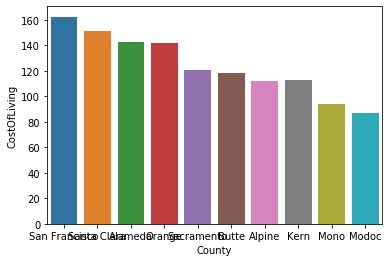

In [126]:
ax=sns.barplot(x=result['County'], y=result['CostOfLiving']);

It is nice to see the cost of living ploted by county in a bar chart, but you would like to see the releationship to the other values. 

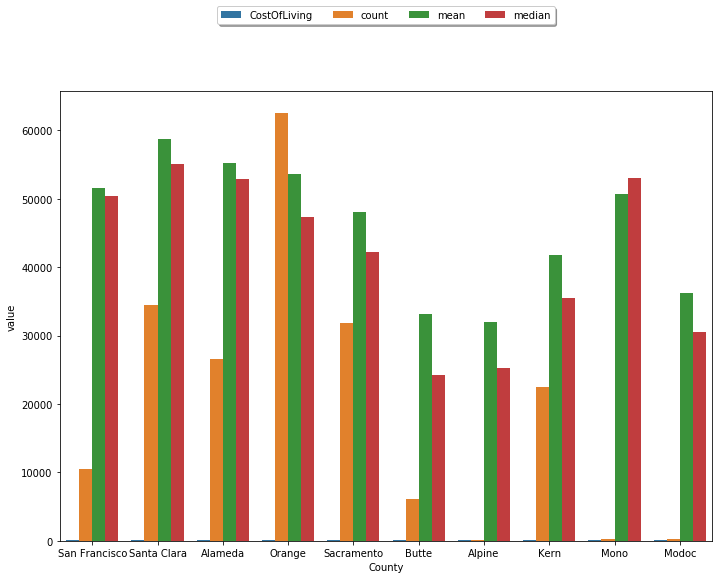

In [127]:
letter_dims = (11, 8.5)
a4_dims = (11.7, 8.27)

fig, ax = plt.subplots(figsize=a4_dims)

mdf=pd.melt(result,id_vars="County",var_name=['stats'])
ax = sns.barplot(x="County", y="value", hue="stats", data=mdf, errwidth=0)  
ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.2), ncol=4, fancybox=True, shadow=True)

The data has to be normalized to fall in the same range (0-100) in order to get to a conclusion. Notice, that the CostOfLiving is barely visible.

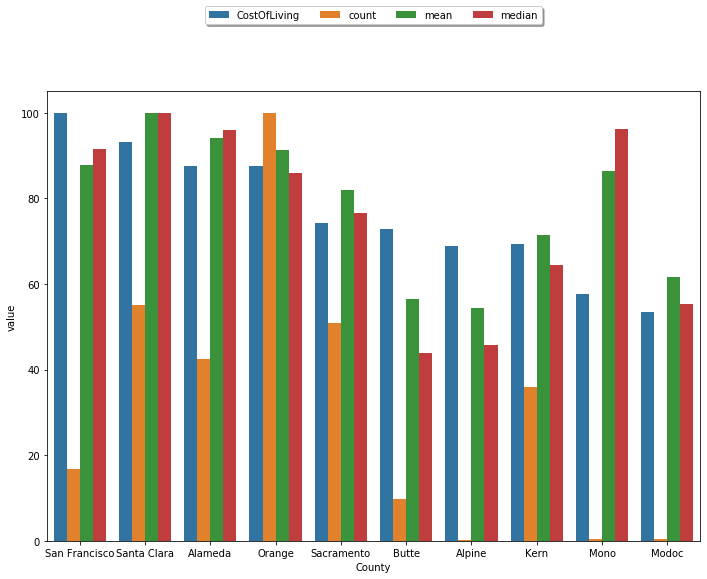

In [128]:
letter_dims = (11, 8.5)
a4_dims = (11.7, 8.27)

fig, ax = plt.subplots(figsize=a4_dims)

mdf=pd.melt(result2,id_vars="County",var_name=['stats'])
ax = sns.barplot(ax=ax, x="County", y="value", hue="stats", data=mdf, errwidth=0)  
ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.2), ncol=4, fancybox=True, shadow=True)

Is there a relationship between Cost of Livng, the number of K-12 employees in a county and the mean and median income of a K-12 employee? 

If the world would be without flaw, you believe your income would be adjusted according to your cost of living. San Francisco and Santa Clara have very hight cost of living numbers. The mean and median income in Santa Clara is higher than in San Francisco. That is counter intuitive. 

Looking at the cost of living and the mean and median income, the expected correlationship seems to be as expected: the lower the cost of living, the lower the mean/median income. Yet, the last 3 counties destroy the picture. Apparently you can have the same income in Mono County as in Santa Clare, yet have a way lower cost of living. 

It begs the question, are the last 3 counties so remote, that you need to get a big stimulus to work/live there? 

#### 2.5.2 Pairplot

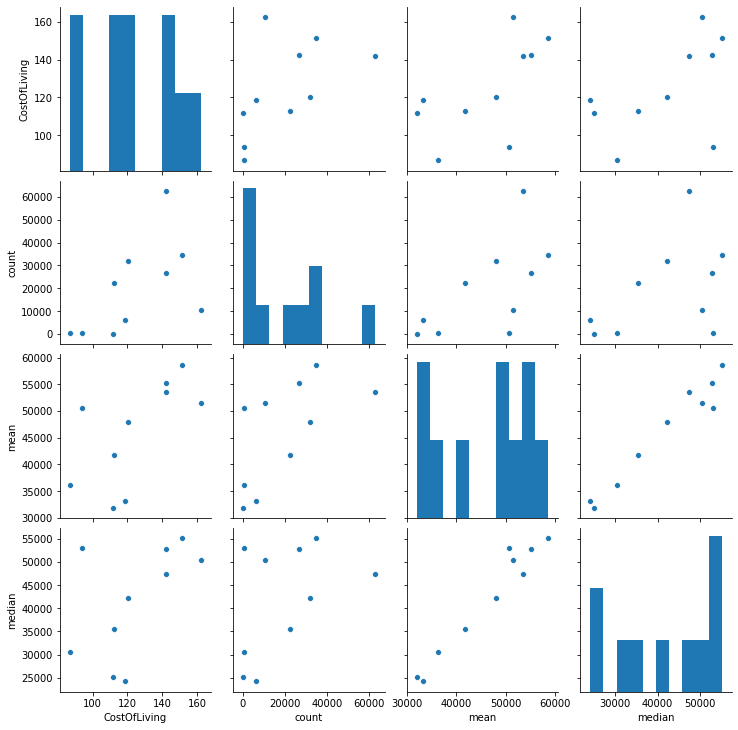

In [129]:
sns.pairplot(result.iloc[:, 1:len(result)-1]);

From the pairplot it is instantaniously visible, that there is a relationship between mean and median. 
The other plots do not have an obvious relationship. Looking at e.g. CostOfLiving vs Mean, I could imaging the ideal approximation as Y = mean(all Y), but it could also be a line with a slope and offset (Y =  β0 +  β1X)

### 2.6 Mathematical proof of relationship

After the visualization gave us a first insight on the relationship of cost of living with income values, it is now time to take the mathematical approach. 

In [130]:
import statsmodels.api as sm

In [131]:
result.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   County        10 non-null     object
 1   CostOfLiving  10 non-null     object
 2   count         10 non-null     object
 3   mean          10 non-null     object
 4   median        10 non-null     object
dtypes: object(5)
memory usage: 528.0+ bytes


In [132]:
# convert all values to float, int
dtype=float
result['CostOfLiving']   = result['CostOfLiving'].astype(dtype)
result['count']   = result['count'].astype(dtype)
result['mean']   = result['mean'].astype(dtype)
result['median']   = result['median'].astype(dtype)
dtype=int
result['count']   = result['count'].astype(dtype)
result.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   County        10 non-null     object 
 1   CostOfLiving  10 non-null     float64
 2   count         10 non-null     int64  
 3   mean          10 non-null     float64
 4   median        10 non-null     float64
dtypes: float64(3), int64(1), object(1)
memory usage: 528.0+ bytes


#### 2.6.1 Correlation Matrix

In [133]:
result.iloc[:, 1:len(result)-1]

,CostOfLiving,count,mean,median
0,162.5000,10460,51517.705534,50357.325
1,151.4000,34528,58648.281242,55064.695
2,142.3000,26531,55168.027347,52839.000
3,142.1625,62572,53559.671445,47340.000
4,120.5000,31780,47992.659175,42161.980
5,118.5000,6076,33168.984013,24217.185
6,111.8000,60,31938.966667,25202.500
7,112.6000,22500,41833.961366,35443.875
8,93.7000,283,50624.032756,53015.000
9,86.8000,323,36169.820279,30481.920


In [134]:
result.iloc[:, 1:len(result)-1].corr()

,CostOfLiving,count,mean,median
CostOfLiving,1.000000,0.556551,0.639757,0.544473
count,0.556551,1.000000,0.622101,0.454025
mean,0.639757,0.622101,1.000000,0.975380
median,0.544473,0.454025,0.975380,1.000000


In the correlation matrix, a variable does matter when the value is close to +1 or -1. A variable does not matter, whet the value is close to 0. If the value is negative, the relation is reciprocal. If the value is positive, the relation is direct.

From the correlation matrix there is no clear correlation between CostOfLiving and the other variables.
There is clear correlation between mean and median as we already discovered from the vizualization. 

#### 2.6.2 Ordinary Least Squares (OLS)

In [135]:
# all values are neither float nor integer. They have to be converted before applying OLS. 
X=sm.add_constant(result[['count','mean','median']])
Y=result['CostOfLiving']

# Ordinary Least Squares
model=sm.OLS(Y.astype(float),X.astype(float)).fit()

model.summary(xname=['constant','count','mean','median'])

/Users/marco/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           CostOfLiving   R-squared:                       0.602
Model:                            OLS   Adj. R-squared:                  0.403
Method:                 Least Squares   F-statistic:                     3.024
Date:                Fri, 14 Aug 2020   Prob (F-statistic):              0.115
Time:                        10:03:23   Log-Likelihood:                -41.152
No. Observations:                  10   AIC:                             90.30
Df Residuals:                       6   BIC:                             91.52
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
constant     -96.5133    110.151     -0.876      0.415    -366.042     173.015
count         -0.0008      0.001     -0.971      0.369      -0.003       0.001
mean           0.0123      0.007      1.669      0.146      -0.006       0.030
median        -0.0079      0.005     -1.512      0.181      -0.021       0.005
==============================================================================
Omnibus:                        2.488   Durbin-Watson:                   1.447
Prob(Omnibus):                  0.288   Jarque-Bera (JB):                1.040
Skew:                           0.789   Prob(JB):                        0.594
Kurtosis:                       2.904   Cond. No.                     1.23e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.23e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

##### 2.6.2.1 How to read this table

- Constant

Constant is the base value for the accuracy of Y or the value we are looking for. 

- Coef

Coef (Coefficient) for the variables is the Beta( β) in Y = β0 + β1X1 + β2 X2 + β3 X3 + ..
If the β is positive, it influences X directly
If the β is negative, it is reciprocal to X 
If β is small, its influence is marginal

- t and P

In the OLS Regression Results, if the t is (much) bigger than 2.1 or (much) less than -2.1 as well as the P is less than 0.05, the Null Hypothesis is rejected. In clear text: the factor for this variable is not null and the factor plays a role in determining the Y.

- R-Squared and Adj. R-Squared

R-squared and Adj. R-squared indicate how well the model represents the reality.
Adjusted R-squared (which we should use) tells us about the model fit. How good a fit is the model with all the data points. It is just one metric but is not always a very reliable metric.
A low R-squared does not mean a bad model.
The value ranges from 0 to 1.
0 means poor fit and 1 means a perfect fit.

- Prob(F-stat) 

is also a measure of model fit. This should be less than 0.05.

##### 2.6.2.2 Reading the table

- Coef

All of the variables count, mean, median have a marginal effect on the outcome. 

- t and P

All t are in between -2.1 and 2.1. All P are bigger than 0.05
That means, the Null hypothesis is accepted. In other words, the variables do not play a role in determining the CostOfLiving. 

- Adj R Squared

For a good fit, R needs to be close to 1. In above table R is neither close to 0 nor close to 1. In other words: there is no conclusion possible. 

- Prob(F-Stat)

The above value is bigger than 0.05, which means this model is not a good fit. 

#### 2.6.3 Variance Inflation Factor (VIF)

VIF measures how much the variance of the estimated regression coefficients are inflated as compared to when the predictor variables are not collinear with each other. This metric is the most reliable way to detect multicollinearity. 

Since it already has been determined through the correlation matrix and the Ordinary Least Squares that all variables do not relate to cost of living, there is no need to try and find variables to be eliminated from the model. 

## 3 Conclusion

Ths initial assumption is that the government takes measures to equalize the burden governmental employees have and that at the end you would have the same purchasing power no matter where in California you live. 

As we have seen in the vizualization of cost of living with the count/mean/median of 'Total Pay', there is a very marginal to no correlation. This is subsequently confirmed by several statistical models. To say it in a manner a teacher would understand: the total pay you receive, is not adjusted for your cost of living. 

Because there is no relationship between cost of living and the total pay, my advise to teachers is not to move to a county with a high cost of living. With a bit of luck the pay in a low cost of living county is equal to the amount paid in the high cost of living county. 

There is a note of caution though: the county sample in this document covers all categories of counties, but the sample size is only 10 of 58 counties. The sample size of 10 counties was chosen over all counties, because of a labor intensive manual process to collect the data. Now that the process has been established, I would advise to include more counties, if not all to get a better picture.  